In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [93]:
# Load data
dPro = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='CLEAN')
cbsyst_stdsw = pd.read_csv('/Users/cameronrichardson/Documents/GitHub/titratorRemoteControl/Python/cbsyst_stdsw.csv')
dmean = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='EXPORT_SAL_MEAN')
d = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='EXPORT_SAL')




# Define colors for each author
author_colors = {
    'ROY93': 'turquoise',
    'GP89': 'black',
    'MILL06': 'green',
    'MM02': 'purple',
    'LUEK00': 'orange',
    'MRG95': 'brown',
    'DM89': 'pink',
}


markers = {
    'ROY93': 'o',
    'GP89': 's',
    'MILL06': 'D',
    'MM02': '^',
    'LUEK00': 'X',
    'MRG95': 'P',
    'DM89': '>'

}


colors = {'AUTO': 'red', 'MAN': 'blue'}


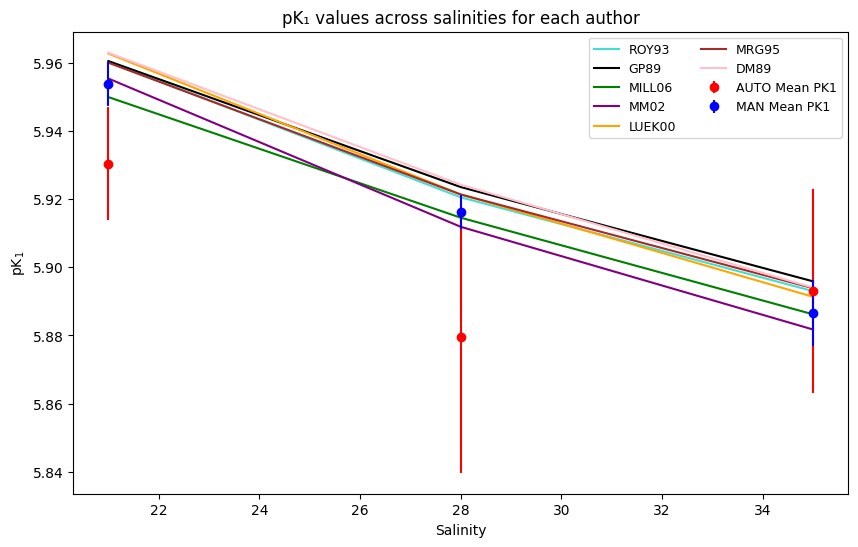

In [94]:




# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the data points for each author as lines
for author, color in author_colors.items():
    author_data = dPro[dPro['AUTHOR'] == author]
    ax.plot(author_data['SALINITY'], author_data['PK1'], color=color, label=author)  

    
# Calculate the mean and standard deviation of PK1 for each method and salinity level

# Filter the dataframe for MAN and AUTO methods
dPro_filtered = dPro[dPro['AUTHOR'].isin(['MAN', 'AUTO'])]

# Calculate the mean and standard deviation of PK1 for each author and salinity level
mean_pk1 = dPro_filtered.groupby(['SALINITY', 'AUTHOR'])['PK1'].mean().unstack()
std_pk1 = dPro_filtered.groupby(['SALINITY', 'AUTHOR'])['PK1'].std().unstack()

# Plot the mean PK1 values with error bars for each method
for method in mean_pk1.columns:
    ax.errorbar(mean_pk1.index, mean_pk1[method], yerr=std_pk1[method], 
    fmt='o', color='blue' if method == 'MAN' else 'red', label=f'{method} Mean PK1')
    # # Plot the data points for MAN and AUTO
    # for method in ['MAN', 'AUTO']:
    #     method_data = dPro[dPro['AUTHOR'] == method]
    #     ax.scatter(method_data['SALINITY'], method_data['PK1'], color='blue' if method == 'MAN' else 'red', label=method, marker='o')



# Set labels and title
ax.set_xlabel('Salinity')
ax.set_ylabel(r'pK$_1$')  # Uses LaTeX for subscript
ax.set_title('pK₁ values across salinities for each author')

# Add legend
ax.legend(loc='best', fontsize=9, ncol=2)

# Show plot
plt.show()


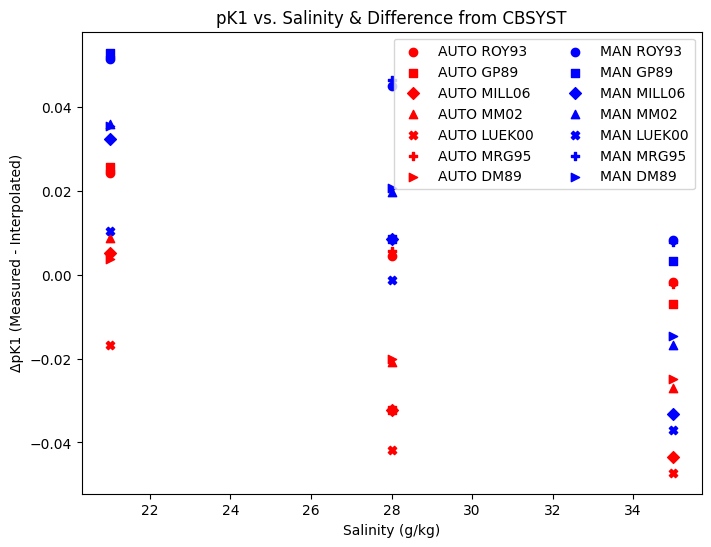

In [86]:
import matplotlib.pyplot as plt



# Initialize added_labels dictionary to track unique legend labels
added_labels = {}

# Calculate the difference between mean values and CBSYST values
cbsyst_mean_pk1 = cbsyst_stdsw.groupby('Salinity')['pK1'].mean()
mean_diff = mean_pk1.sub(cbsyst_mean_pk1, axis=0)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the original data (ΔpK1 values) as scatter points
for salinity, df in zip([35, 28, 21], [dmean_35, dmean_28, dmean_21]):
    for method in ['AUTO', 'MAN']:
        subset = df[df['METHOD'] == method]
        for author in markers.keys():
            if author in subset.columns:
                label = f'{method} {author}'
                if label not in added_labels:  # Only add unique legend labels
                    added_labels[label] = ax.scatter(subset['SALINITY'], subset[author], 
                                                      label=label, marker=markers[author], 
                                                      color=colors[method])
                else:
                    ax.scatter(subset['SALINITY'], subset[author], marker=markers[author], 
                               color=colors[method])  # No label to avoid duplicates


# Set labels and title
ax.set_xlabel('Salinity (g/kg)')
ax.set_ylabel('ΔpK1 (Measured - Interpolated)')
ax.set_title('pK1 vs. Salinity & Difference from CBSYST')

# Add legend with only unique labels
ax.legend(loc='best', ncol=2)

# Show plot
plt.show()


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

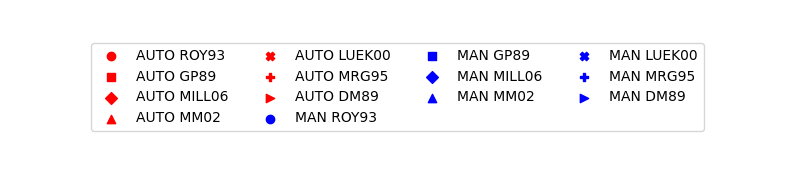

In [87]:
fig_legend = plt.figure(figsize=(10, 2))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', ncol=4)
ax_legend.axis('off')


/var/folders/rp/6325jg2164gg259yvxgz1lzm0000gn/T/ipykernel_4894/4145489103.py:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  added_labels[label] = ax.errorbar(subset['SALINITY'], subset[author],
/var/folders/rp/6325jg2164gg259yvxgz1lzm0000gn/T/ipykernel_4894/4145489103.py:43: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(subset['SALINITY'], subset[author],


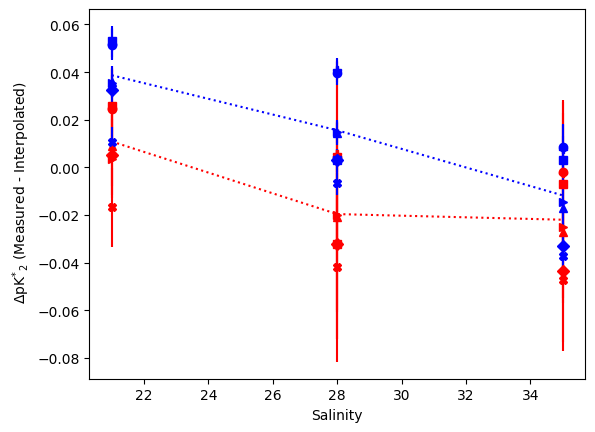

In [88]:
# Create a figure and axis
# Create a figure and axis
fig, ax = plt.subplots()

# Filter the dataframe to only select PK2

dmean_35 = dmean[(dmean['SALINITY'] == 35) & (dmean['PK'] == 2)]
dmean_28 = dmean[(dmean['SALINITY'] == 28) & (dmean['PK'] == 2)]
dmean_21 = dmean[(dmean['SALINITY'] == 21) & (dmean['PK'] == 2)]

dmeanpK2 = dmean[(dmean['PK'] == 2)]

# Use the AVG column in dmean to get the average difference in pK1 for each method and salinity
avg_diff_pk2 = dmeanpK2.pivot_table(values='AVG', index='SALINITY', columns='METHOD')

# Plot the average difference in pK1 as a dotted line for each method
ax.plot(avg_diff_pk2.index, avg_diff_pk2['AUTO'], color='red', linestyle=':', label='AUTO Avg ΔpK2')
ax.plot(avg_diff_pk2.index, avg_diff_pk2['MAN'], color='blue', linestyle=':', label='MAN Avg ΔpK2')


# Dictionary to track added labels
added_labels = {}
author_std = {}

# Calculate the standard deviation of each author's differences from pK2
for author in markers.keys():
    author_std[author] = d.groupby(['SALINITY', 'METHOD'])[author].std()

# Plot for each salinity level
for salinity, df in zip([35, 28, 21], [dmean_35, dmean_28, dmean_21]):
    for method in ['AUTO', 'MAN']:
        subset = df[df['METHOD'] == method]
        
        for author in markers.keys():
            if author in subset.columns:
                label = f'{method} {author}'
                if label not in added_labels:  # Only add unique legend labels
                    added_labels[label] = ax.errorbar(subset['SALINITY'], subset[author], 
                                                      yerr=author_std[author].loc[salinity, method], 
                                                      fmt='o', label=label, marker=markers[author], 
                                                      color=colors[method])
                else:
                    ax.errorbar(subset['SALINITY'], subset[author], 
                                yerr=author_std[author].loc[salinity, method], 
                                fmt='o', marker=markers[author], 
                                color=colors[method])  # No label to avoid duplicates

ax.set_xlabel('Salinity')
ax.set_ylabel(r' ΔpK$^{*}$$_{2}$ (Measured - Interpolated)')

# Show legend plot
plt.show()


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

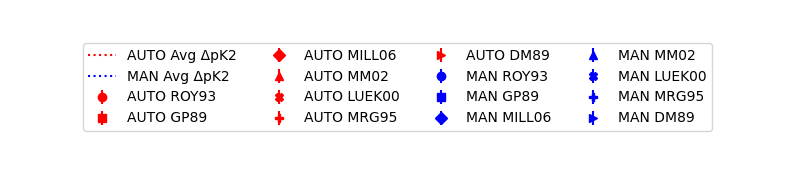

In [82]:
fig_legend = plt.figure(figsize=(10, 2))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', ncol=4)
ax_legend.axis('off')


/var/folders/rp/6325jg2164gg259yvxgz1lzm0000gn/T/ipykernel_4894/639050254.py:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  added_labels[label] = ax.errorbar(subset['SALINITY'], subset[author],
/var/folders/rp/6325jg2164gg259yvxgz1lzm0000gn/T/ipykernel_4894/639050254.py:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(subset['SALINITY'], subset[author],


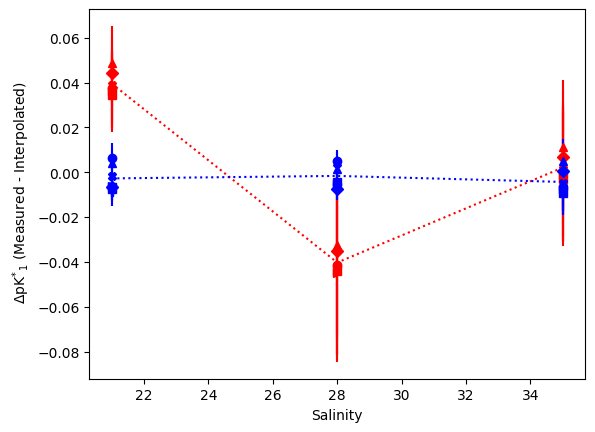

In [77]:
# Create a figure and axis
fig, ax = plt.subplots()

# Filter the dataframe to only select PK1
dmean_35 = dmean[(dmean['SALINITY'] == 35) & (dmean['PK'] == 1)]
dmean_28 = dmean[(dmean['SALINITY'] == 28) & (dmean['PK'] == 1)]
dmean_21 = dmean[(dmean['SALINITY'] == 21) & (dmean['PK'] == 1)]

dmeanpK1 = dmean[(dmean['PK'] == 1)]

# Use the AVG column in dmean to get the average difference in pK1 for each method and salinity
avg_diff_pk1 = dmeanpK1.pivot_table(values='AVG', index='SALINITY', columns='METHOD')

# Plot the average difference in pK1 as a dotted line for each method
ax.plot(avg_diff_pk1.index, avg_diff_pk1['AUTO'], color='red', linestyle=':', label='AUTO Avg ΔpK1')
ax.plot(avg_diff_pk1.index, avg_diff_pk1['MAN'], color='blue', linestyle=':', label='MAN Avg ΔpK1')

# Dictionary to track added labels
added_labels = {}
author_std = {}

# Calculate the standard deviation of each author's differences from pK1
for author in markers.keys():
    author_std[author] = d.groupby(['SALINITY', 'METHOD'])[author].std()

# Plot for each salinity level
for salinity, df in zip([35, 28, 21], [dmean_35, dmean_28, dmean_21]):
    for method in ['AUTO', 'MAN']:
        subset = df[df['METHOD'] == method]
        
        for author in markers.keys():
            if author in subset.columns:
                label = f'{method} {author}'
                if label not in added_labels:  # Only add unique legend labels
                    added_labels[label] = ax.errorbar(subset['SALINITY'], subset[author], 
                                                      yerr=author_std[author].loc[salinity, method], 
                                                      fmt='o', label=label, marker=markers[author], 
                                                      color=colors[method])
                else:
                    ax.errorbar(subset['SALINITY'], subset[author], 
                                yerr=author_std[author].loc[salinity, method], 
                                fmt='o', marker=markers[author], 
                                color=colors[method])  # No label to avoid duplicates

ax.set_xlabel('Salinity')
ax.set_ylabel(r' ΔpK$^{*}$$_{1}$ (Measured - Interpolated)')

# Show legend plot
plt.show()


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

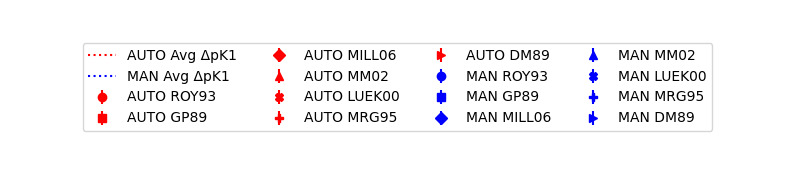

In [78]:
fig_legend = plt.figure(figsize=(10, 2))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', ncol=4)
ax_legend.axis('off')


NameError: name 'd_35' is not defined

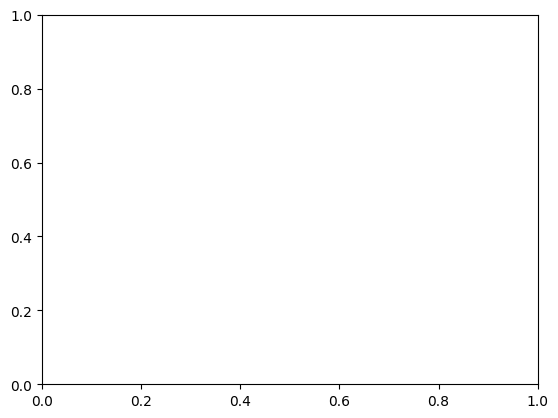

In [75]:


# Extract pK1 values from cbsyst_stdsw for each salinity level
cbsyst_salinity = cbsyst_stdsw['Salinity']
cbsyst_pk1 = cbsyst_stdsw['pK1']

# Plot the pK1 values from cbsyst_stdsw as a black line



# Create a figure and axis
fig, ax = plt.subplots()

# Plot pK1 values for each salinity level
for salinity, df in zip([35, 28, 21], [d_35, d_28, d_21]):
    for method in ['AUTO', 'MAN']:
        subset = df[df['METHOD'] == method]
        ax.scatter(subset['SALINITY'], subset['PK1'], label=f'{method} {salinity}', color=colors[method])
        ax.plot(cbsyst_salinity, cbsyst_pk1, color='black', label='CBSYST pK1')

# Set labels and title
ax.set_xlabel('Salinity')
ax.set_ylabel('pK1')
ax.set_title('pK1 vs. Salinity for Different Methods')

# Add legend
# ax.legend(loc='best', ncol=2)

# Show plot
plt.show()

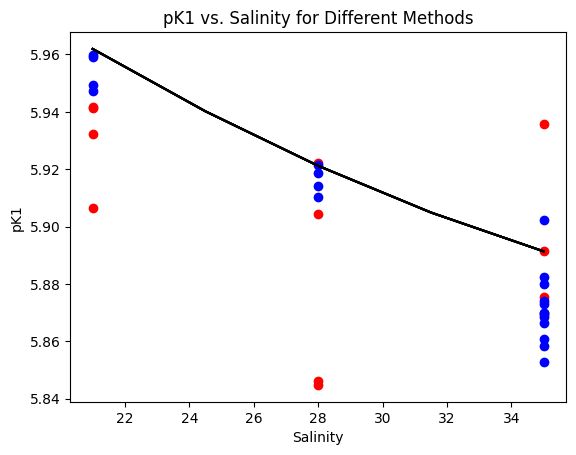

In [ ]:
# Read in a CSV file
cbsyst_stdsw = pd.read_csv('/Users/cameronrichardson/Documents/GitHub/titratorRemoteControl/Python/cbsyst_stdsw.csv')

# Extract pK1 values from cbsyst_stdsw for each salinity level
cbsyst_salinity = cbsyst_stdsw['Salinity']
cbsyst_pk1 = cbsyst_stdsw['pK1']

# Plot the pK1 values from cbsyst_stdsw as a black line



# Create a figure and axis
fig, ax = plt.subplots()

# Plot pK1 values for each salinity level
for salinity, df in zip([35, 28, 21], [d_35, d_28, d_21]):
    for method in ['AUTO', 'MAN']:
        subset = df[df['METHOD'] == method]
        ax.scatter(subset['SALINITY'], subset['PK1'], label=f'{method} {salinity}', color=colors[method])
        ax.plot(cbsyst_salinity, cbsyst_pk1, color='black', label='CBSYST pK1')

# Set labels and title
ax.set_xlabel('Salinity')
ax.set_ylabel('pK1')
ax.set_title('pK1 vs. Salinity for Different Methods')

# Add legend
# ax.legend(loc='best', ncol=2)

# Show plot
plt.show()

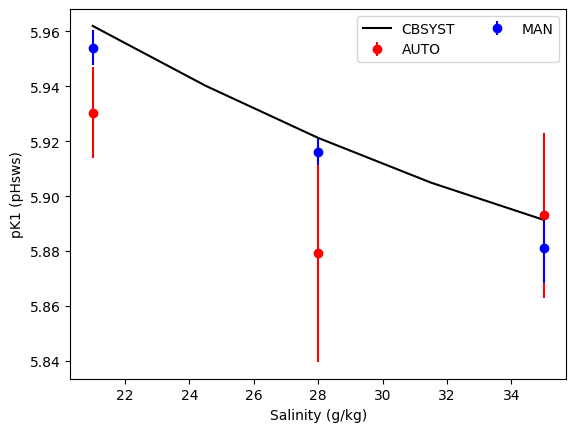

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

colors = {'AUTO': 'red', 'MAN': 'blue'}

# Calculate the mean and standard deviation of PK1 for each salinity level
mean_pk1 = dmean.groupby(['SALINITY', 'METHOD'])['PK1'].mean().unstack()
std_pk1 = d.groupby(['SALINITY', 'METHOD'])['PK1'].std().unstack()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the mean PK1 values with error bars for each method
for method in mean_pk1.columns:
    ax.errorbar(mean_pk1.index, mean_pk1[method], yerr=std_pk1[method], 
                fmt='o', color=colors.get(method, 'gray'), label=method)  # Set color explicitly

# Read in a CSV file
cbsyst_stdsw = pd.read_csv('/Users/cameronrichardson/Documents/GitHub/titratorRemoteControl/Python/cbsyst_stdsw.csv')

# Extract pK1 values from cbsyst_stdsw for each salinity level
cbsyst_salinity = cbsyst_stdsw['Salinity']
cbsyst_pk1 = cbsyst_stdsw['pK1']

# Plot the pK1 values from cbsyst_stdsw as a black line
ax.plot(cbsyst_salinity, cbsyst_pk1, color='black', label='CBSYST')

# Set labels and title
ax.set_xlabel('Salinity (g/kg)')
ax.set_ylabel('pK1 (pHsws)')
# ax.set_title('pK1 vs. Salinity for Different Methods')

# Add legend
ax.legend(loc='best', ncol=2)

# Show plot
plt.show()


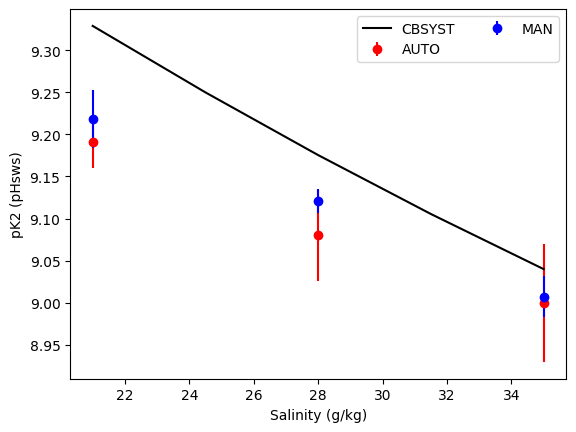

In [ ]:
# Replace PK1 with PK2 in the calculations and plotting




# Calculate the mean and standard deviation of PK2 for each salinity level
mean_pk2 = dmean.groupby(['SALINITY', 'METHOD'])['PK2'].mean().unstack()
std_pk2 = d.groupby(['SALINITY', 'METHOD'])['PK2'].std().unstack()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the mean PK1 values with error bars for each method
for method in mean_pk2.columns:
    ax.errorbar(mean_pk2.index, mean_pk2[method], yerr=std_pk2[method], 
                fmt='o', color=colors.get(method, 'gray'), label=method)  # Set color explicitly

# Read in a CSV file
cbsyst_stdsw = pd.read_csv('/Users/cameronrichardson/Documents/GitHub/titratorRemoteControl/Python/cbsyst_stdsw.csv')

# Extract pK1 values from cbsyst_stdsw for each salinity level
cbsyst_salinity = cbsyst_stdsw['Salinity']
cbsyst_pk2 = cbsyst_stdsw['pK2']

# Plot the pK1 values from cbsyst_stdsw as a black line
ax.plot(cbsyst_salinity, cbsyst_pk2, color='black', label='CBSYST')

# Set labels and title
ax.set_xlabel('Salinity (g/kg)')
ax.set_ylabel('pK2 (pHsws)')

# Add legend
ax.legend(loc='best', ncol=2)

# Show plot
plt.show()


In [ ]:
Mg

0.027062462212790597

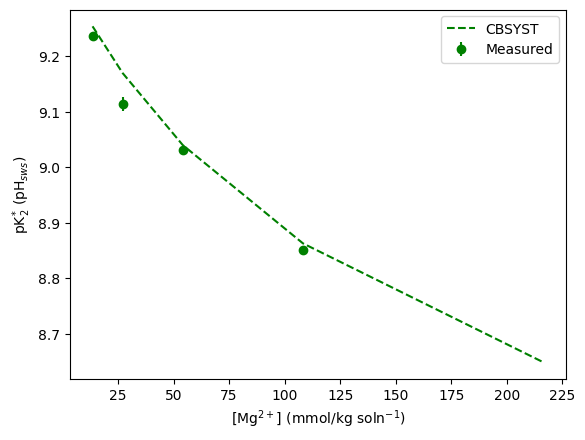

In [141]:


# Load data

cbsyst_nonstdsw = pd.read_csv('/Users/cameronrichardson/Documents/GitHub/titratorRemoteControl/Python/cbsyst_nonstdstdsw20C35S.csv')
mg_nonstd = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='MG')

# Compute mean and standard deviation for pK2
mg_nonstd_mean_pK2 = mg_nonstd.groupby('Mg conc')['PK2'].mean().reset_index()
mg_nonstd_std_pK2 = mg_nonstd.groupby('Mg conc')['PK2'].std().reset_index()

# Compute mean and standard deviation for pK1
mg_nonstd_mean_pK1 = mg_nonstd.groupby('Mg conc')['PK1'].mean().reset_index()
mg_nonstd_std_pK1 = mg_nonstd.groupby('Mg conc')['PK1'].std().reset_index()

# Merge the standard deviation data with the mean data
mg_nonstd_mean_pK2 = mg_nonstd_mean_pK2.merge(mg_nonstd_std_pK2, on='Mg conc', suffixes=('_mean', '_std'))
mg_nonstd_mean_pK1 = mg_nonstd_mean_pK1.merge(mg_nonstd_std_pK1, on='Mg conc', suffixes=('_mean', '_std'))

# Create a figure and axis
fig, ax = plt.subplots()

conc = mg_nonstd_mean_pK2['Mg conc']*1000


# Plot pK2 (orange circles with error bars)
ax.errorbar(mg_nonstd_mean_pK2['Mg conc']*1000, mg_nonstd_mean_pK2['PK2_mean'], 
            yerr=mg_nonstd_mean_pK2['PK2_std'], fmt='o', color='green', label='Measured')

# Plot pK1 (blue squares with error bars)
# ax.errorbar(mg_nonstd_mean_pK1['Mg conc'], mg_nonstd_mean_pK1['PK1_mean'], 
            # yerr=mg_nonstd_mean_pK1['PK1_std'], fmt='s', color='blue', label='Mean pK1 vs Mg conc')

# Plot CBSYST pK2 as a black line
ax.plot(cbsyst_nonstdsw['Mgconc']*1000, cbsyst_nonstdsw['pK2'], color='green', linestyle='--', label='CBSYST')

# Plot CBSYST pK1 as a black dashed line
# ax.plot(cbsyst_nonstdsw['Mgconc'], cbsyst_nonstdsw['pK1'], color='black', linestyle='--', label='CBSYST pK1')

# Set labels and title
ax.set_xlabel('[Mg$^{2+}$] (mmol/kg soln$^{-1}$)')
ax.set_ylabel('pK$^{*}_{2}$ (pH$_{sws}$)')

# Add legend
ax.legend(loc='best')

# Show plot
plt.show()


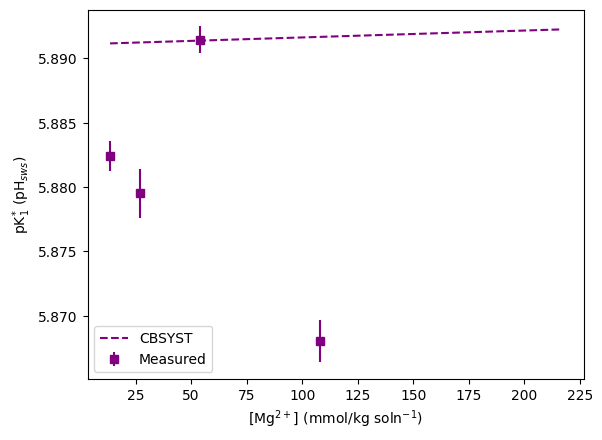

In [137]:


fig, ax = plt.subplots()


# Plot pK1 (blue squares with error bars)
ax.errorbar(mg_nonstd_mean_pK1['Mg conc']*1000, mg_nonstd_mean_pK1['PK1_mean'], 
yerr=mg_nonstd_mean_pK1['PK1_std'], fmt='s', color='purple', label='Measured')

# Plot CBSYST pK1 as a black dashed line
ax.plot(cbsyst_nonstdsw['Mgconc']*1000, cbsyst_nonstdsw['pK1'], color='purple', linestyle='--', label='CBSYST')

# Set labels and title
ax.set_xlabel('[Mg$^{2+}$] (mmol/kg soln$^{-1}$)')
ax.set_ylabel('pK$^{*}_{1}$ (pH$_{sws}$)')

# Add legend
ax.legend(loc='best')

# Show plot
plt.show()


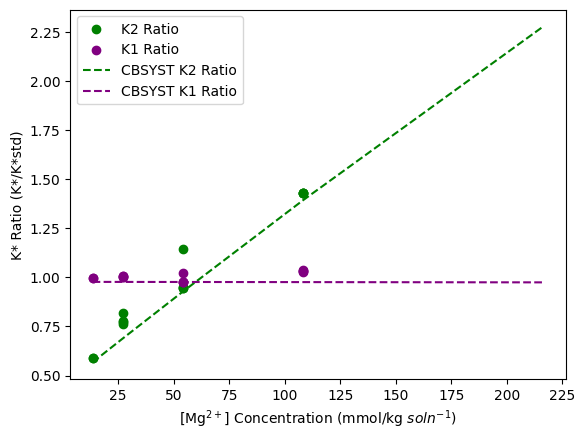

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
cbsyst_nonstdsw = pd.read_csv('/Users/cameronrichardson/Documents/GitHub/titratorRemoteControl/Python/cbsyst_nonstdstdsw20C35S.csv')
mg_nonstd = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='MG')


k2const = 0.000000000983798
k1const = 0.000001314385796


# Multiply Mg conc by 1000
mg_nonstd['Mg conc'] *= 1000
# Divide the K2 and K1 values by the constants
mg_nonstd['K2'] = 10 ** -mg_nonstd['PK2']
mg_nonstd['K1'] = 10 ** -mg_nonstd['PK1']

mg_nonstd['K2_ratio'] = mg_nonstd['K2'] / k2const
mg_nonstd['K1_ratio'] = mg_nonstd['K1'] / k1const

# Create a new dataframe with the ratios
kratio = mg_nonstd[['Mg conc', 'K2_ratio', 'K1_ratio']]



# Divide the CBSYST K2 and K1 values by the constants
cbsyst_nonstdsw['K2'] = 10 ** -cbsyst_nonstdsw['pK2']
cbsyst_nonstdsw['K1'] = 10 ** -cbsyst_nonstdsw['pK1']

cbsyst_nonstdsw['K2_ratio'] = cbsyst_nonstdsw['K2'] / k2const
cbsyst_nonstdsw['K1_ratio'] = cbsyst_nonstdsw['K1'] / k1const
cbsyst_nonstdsw['Mgconc'] *= 1000

# Create a new dataframe with the ratios
cbsyst_kratio = cbsyst_nonstdsw[['Mgconc', 'K2_ratio', 'K1_ratio']]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot K2 ratios as points
ax.scatter(kratio['Mg conc'], kratio['K2_ratio'], label='K2 Ratio', color='green')

# Plot K1 ratios as points
ax.scatter(kratio['Mg conc'], kratio['K1_ratio'], label='K1 Ratio', color='purple')

# Plot CBSYST K2 ratios as a line
ax.plot(cbsyst_kratio['Mgconc'], cbsyst_kratio['K2_ratio'], '--', label='CBSYST K2 Ratio', color='green')

# Plot CBSYST K1 ratios as a line
ax.plot(cbsyst_kratio['Mgconc'], cbsyst_kratio['K1_ratio'], '--', label='CBSYST K1 Ratio', color='purple')

# Set labels and title
ax.set_xlabel(r'[Mg$^{2+}$] Concentration (mmol/kg $soln^{-1}$)')
ax.set_ylabel('K* Ratio (K*/K*std)')
# ax.set_title('K2 and K1 Ratios vs Mg Concentration')

# Add legend
ax.legend(loc='best')

# Show plot
plt.show()

In [70]:

# Load data
cbsyst_nonstdsw = pd.read_csv('/Users/cameronrichardson/Documents/GitHub/titratorRemoteControl/Python/cbsyst_nonstdstdsw20C35S.csv')
mg_nonstd = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='MG')

# Constants
k2const = 0.000000000978251
k1const = 0.000001298466465

# Multiply Mg conc by 1000 (convert to mmol/kg)
mg_nonstd['Mg conc'] *= 1000

# Convert pK to K values
mg_nonstd['K2'] = 10 ** -mg_nonstd['PK2']
mg_nonstd['K1'] = 10 ** -mg_nonstd['PK1']

# Calculate K ratios
mg_nonstd['K2_ratio'] = mg_nonstd['K2'] / k2const
mg_nonstd['K1_ratio'] = mg_nonstd['K1'] / k1const

# Compute mean and std deviation for each Mg conc
kratio_stats = mg_nonstd.groupby('Mg conc')[['K2_ratio', 'K1_ratio']].agg(['mean', 'std']).reset_index()

# Process CBSYST data
cbsyst_nonstdsw['Mgconc'] *= 1000
cbsyst_nonstdsw['K2'] = 10 ** -cbsyst_nonstdsw['pK2']
cbsyst_nonstdsw['K1'] = 10 ** -cbsyst_nonstdsw['pK1']
cbsyst_nonstdsw['K2_ratio'] = cbsyst_nonstdsw['K2'] / k2const
cbsyst_nonstdsw['K1_ratio'] = cbsyst_nonstdsw['K1'] / k1const

# Create figure
fig, ax = plt.subplots()

# Plot mean K2 ratio with std deviation
ax.errorbar(kratio_stats['Mg conc'], kratio_stats[('K2_ratio', 'mean')],
            yerr=kratio_stats[('K2_ratio', 'std')], fmt='o', color='green', label='K$_{2}$$^{*}$')

# Plot mean K1 ratio with std deviation
ax.errorbar(kratio_stats['Mg conc'], kratio_stats[('K1_ratio', 'mean')],
            yerr=kratio_stats[('K1_ratio', 'std')], fmt='s', color='purple', label='K$_{1}$$^{*}$')

# Plot CBSYST K2 and K1 ratios as dashed lines
ax.plot(cbsyst_nonstdsw['Mgconc'], cbsyst_nonstdsw['K2_ratio'], '--', color='green', label='CBSYST K$_{2}$$^{*}$')
ax.plot(cbsyst_nonstdsw['Mgconc'], cbsyst_nonstdsw['K1_ratio'], '--', color='purple', label='CBSYST K$_{1}$$^{*}$')

# Set labels and title
ax.set_xlabel(r'[Mg$^{2+}$] (mmol/kg soln$^{-1}$)')
ax.set_xlim(0, 150)
ax.set_ylabel('(K$_{i}$$^{*}$/K$^{*}$$_{std.sw}$)')
ax.legend(loc='best')

# Show plot
plt.show()


ValueError: Worksheet named 'MG' not found

ValueError: 'x' and 'y' must have the same size

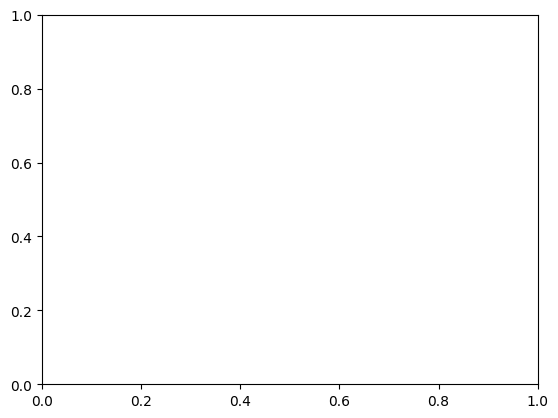

In [10]:

nonstd = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='nonStandard')


# Filter the data for Mg ion
nonstd_mg = nonstd[nonstd['Ion'] == 'Mg']

# Calculate the standard deviation of pK1 and pK2 for each concentration
std_pk1 = nonstd_mg.groupby('Concentration')['pK1'].std().reset_index()
std_pk2 = nonstd_mg.groupby('Concentration')['pK2'].std().reset_index()

# Merge the standard deviation data with the original data
nonstd_mg = nonstd_mg.merge(std_pk1, on='Concentration', suffixes=('', '_std_pk1'))
nonstd_mg = nonstd_mg.merge(std_pk2, on='Concentration', suffixes=('', '_std_pk2'))

std_pk1 = nonstd.groupby('Concentration')['pK1'].std().reset_index()
std_pk2 = nonstd.groupby('Concentration')['pK2'].std().reset_index()

# Merge the standard deviation data with the original data
nonstd = nonstd.merge(std_pk1, on='Concentration', suffixes=('', '_std_pk1'))
nonstd = nonstd.merge(std_pk2, on='Concentration', suffixes=('', '_std_pk2'))


# Create a figure and axis for pK1
fig_pk1, ax_pk1 = plt.subplots()

# Plot pK1 values with error bars
ax_pk1.errorbar(nonstd['Concentration'], nonstd_mg['pK1'], yerr=nonstd_mg['pK1_std_pk1'], fmt='o', label='pK1', color='blue')

# Set labels and title for pK1
ax_pk1.set_xlabel('Concentration')
ax_pk1.set_ylabel('pK1 Value')
ax_pk1.set_title('pK1 Values as a Function of Concentration')

# Add legend for pK1
ax_pk1.legend(loc='best')

# Create a figure and axis for pK2
fig_pk2, ax_pk2 = plt.subplots()

# Plot pK2 values with error bars
ax_pk2.errorbar(nonstd['Concentration'], nonstd['pK2'], yerr=nonstd['pK2_std_pk2'], fmt='o', label='pK2', color='red')

# Set labels and title for pK2
ax_pk2.set_xlabel('Concentration')
ax_pk2.set_ylabel('pK2 Value')
ax_pk2.set_title('pK2 Values as a Function of Concentration')

# Add legend for pK2
ax_pk2.legend(loc='best')

# Show plots
plt.show()



# # Constants
# k2const = 0.000000000978251
# k1const = 0.000001298466465

# # Multiply Mg conc by 1000 (convert to mmol/kg)
# mg_nonstd['Mg conc'] *= 1000

# # Convert pK to K values
# mg_nonstd['K2'] = 10 ** -mg_nonstd['PK2']
# mg_nonstd['K1'] = 10 ** -mg_nonstd['PK1']

# # Calculate K ratios
# mg_nonstd['K2_ratio'] = mg_nonstd['K2'] / k2const
# mg_nonstd['K1_ratio'] = mg_nonstd['K1'] / k1const

# # Compute mean and std deviation for each Mg conc
# kratio_stats = mg_nonstd.groupby('Mg conc')[['K2_ratio', 'K1_ratio']].agg(['mean', 'std']).reset_index()

# # Process CBSYST data
# cbsyst_nonstdsw['Mgconc'] *= 1000
# cbsyst_nonstdsw['K2'] = 10 ** -cbsyst_nonstdsw['pK2']
# cbsyst_nonstdsw['K1'] = 10 ** -cbsyst_nonstdsw['pK1']
# cbsyst_nonstdsw['K2_ratio'] = cbsyst_nonstdsw['K2'] / k2const
# cbsyst_nonstdsw['K1_ratio'] = cbsyst_nonstdsw['K1'] / k1const

# # Create figure
# fig, ax = plt.subplots()

# # Plot mean K2 ratio with std deviation
# ax.errorbar(kratio_stats['Mg conc'], kratio_stats[('K2_ratio', 'mean')],
#             yerr=kratio_stats[('K2_ratio', 'std')], fmt='o', color='green', label='K$_{2}$$^{*}$')

# # Plot mean K1 ratio with std deviation
# ax.errorbar(kratio_stats['Mg conc'], kratio_stats[('K1_ratio', 'mean')],
#             yerr=kratio_stats[('K1_ratio', 'std')], fmt='s', color='purple', label='K$_{1}$$^{*}$')

# # Plot CBSYST K2 and K1 ratios as dashed lines
# ax.plot(cbsyst_nonstdsw['Mgconc'], cbsyst_nonstdsw['K2_ratio'], '--', color='green', label='CBSYST K$_{2}$$^{*}$')
# ax.plot(cbsyst_nonstdsw['Mgconc'], cbsyst_nonstdsw['K1_ratio'], '--', color='purple', label='CBSYST K$_{1}$$^{*}$')

# # Set labels and title
# ax.set_xlabel(r'[Mg$^{2+}$] (mmol/kg soln$^{-1}$)')
# ax.set_xlim(0, 225)
# ax.set_ylabel('(K$_{i}$$^{*}$/K$^{*}$$_{std.sw}$)')
# ax.legend(loc='best')

# # Show plot
# plt.show()


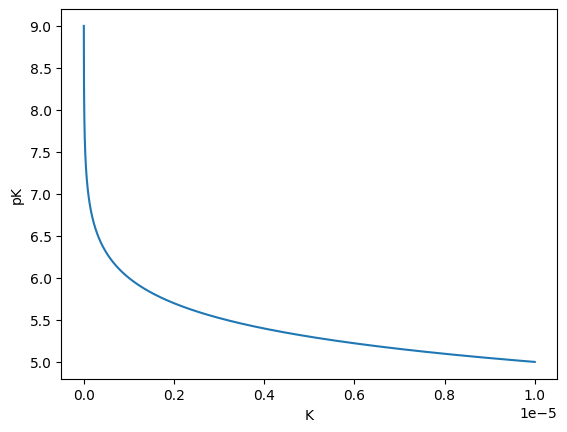

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Generate x values from 1 to 1000 (starting from 1 to avoid log(0) which is undefined)
x = np.linspace(0.000000001, 0.00001, 10000000)
# Calculate -log10(x)
y = -np.log10(x)

# Create a plot
plt.plot(x, y)
plt.xlabel('K')
plt.ylabel('pK')

plt.show()

In [178]:
from sklearn.linear_model import LinearRegression

nonstd = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='nonStandard')
MP_pitzer = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/millero_pierrot_pitzer_data.xlsx')

k1_std = 1.327226722746260000E-06
k2_std = 8.195863015998090000E-10

nonstd['K1'] = 10 ** -nonstd['pK1']
nonstd['K2'] = 10 ** -nonstd['pK2']

MP_pitzer['K1'] = 10 ** -MP_pitzer['pK1']
MP_pitzer['K2'] = 10 ** -MP_pitzer['pK2']

nonstd['K1_ratio'] = nonstd['K1'] / k1_std
nonstd['K2_ratio'] = nonstd['K2'] / k2_std

MP_pitzer['K1_ratio'] = MP_pitzer['K1'] / k1_std
MP_pitzer['K2_ratio'] = MP_pitzer['K2'] / k2_std

ion_stats = nonstd.groupby(['Ion', 'Concentration Multiplier']).agg({
    'K1_ratio': ['mean', 'std'],
    'K2_ratio': ['mean', 'std'],
    'pK1': ['mean', 'std'],
    'pK2': ['mean', 'std']
}).reset_index()

# Flatten column names after groupby
ion_stats.columns = ['Ion', 'Concentration Multiplier', 'K1_ratio_mean', 'K1_ratio_std', 'K2_ratio_mean', 'K2_ratio_std', 'pK1_mean', 'pK1_std', 'pK2_mean', 'pK2_std']

# Get unique ions
ions = ion_stats['Ion'].unique()


MP_pitzer_stats = MP_pitzer.groupby(['Ion', 'Concentration Multiplier']).agg({
    'K1_ratio': ['mean', 'std'],
    'K2_ratio': ['mean', 'std'],
    'pK1': ['mean', 'std'],
    'pK2': ['mean', 'std']
}).reset_index()

# Flatten column names after groupby
MP_pitzer_stats.columns = ['Ion', 'Concentration Multiplier', 'K1_ratio_mean', 'K1_ratio_std', 'K2_ratio_mean', 'K2_ratio_std', 'pK1_mean', 'pK1_std', 'pK2_mean', 'pK2_std']

# Get unique ions for MP_pitzer
MP_pitzer_ions = MP_pitzer_stats['Ion'].unique()







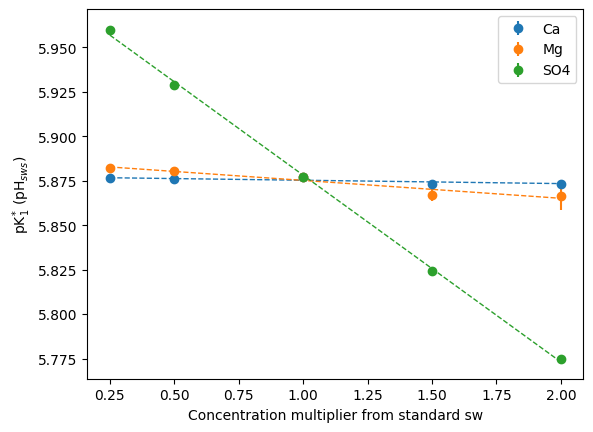

In [93]:


# Create a figure and axis for pK1 with regression lines
fig_pk1, ax_pk1 = plt.subplots()


# Plot the data for each ion and add a linear regression line
for ion in ion_stats['Ion'].unique():
    ion_data = ion_stats[ion_stats['Ion'] == ion]
    ax_pk1.errorbar(ion_data['Concentration Multiplier'], ion_data['pK1_mean'], 
                    yerr=ion_data['pK1_std'], fmt='o', label=f'{ion}')
    
    # Fit a linear regression model
    X = ion_data['Concentration Multiplier'].values.reshape(-1, 1)
    y = ion_data['pK1_mean'].values
    
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Plot the regression line with the same color as the points and thin line
    ax_pk1.plot(ion_data['Concentration Multiplier'], y_pred, linestyle='--', linewidth=1, color=ax_pk1.get_lines()[-1].get_color())

# Set labels and title for pK1
ax_pk1.set_xlabel('Concentration multiplier from standard sw')
ax_pk1.set_ylabel('pK$^{*}_{1}$ (pH$_{sws}$)')


# Add legend for pK1
ax_pk1.legend(loc='best')

# Show plot
plt.show()






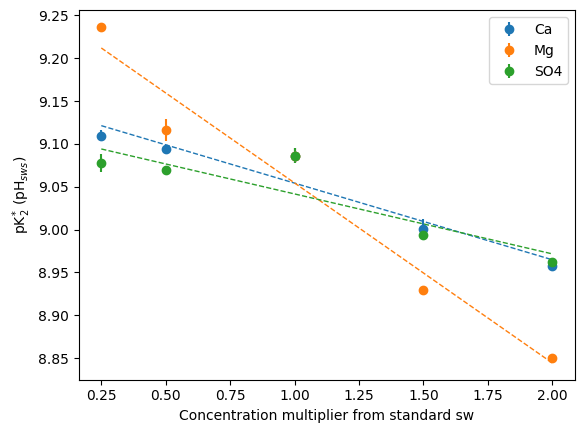

In [ ]:




# Create a figure and axis for pK1 with regression lines
fig_pk2, ax_pk2 = plt.subplots()

# Plot the data for each ion and add a linear regression line
for ion in ion_stats['Ion'].unique():
    ion_data = ion_stats[ion_stats['Ion'] == ion]
    ax_pk2.errorbar(ion_data['Concentration Multiplier'], ion_data['pK2_mean'], 
                    yerr=ion_data['pK2_std'], fmt='o', label=f'{ion}')
    
    # Fit a linear regression model
    X = ion_data['Concentration Multiplier'].values.reshape(-1, 1)
    y = ion_data['pK2_mean'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Plot the regression line with the same color as the points and thin line
    ax_pk2.plot(ion_data['Concentration Multiplier'], y_pred, linestyle='--', linewidth=1, color=ax_pk2.get_lines()[-1].get_color())

# Set labels and title for pK1
ax_pk2.set_xlabel('Concentration multiplier from standard sw')
ax_pk2.set_ylabel('pK$^{*}_{2}$ (pH$_{sws}$)')


# Add legend for pK1
ax_pk2.legend(loc='best')

# Show plot
plt.show()






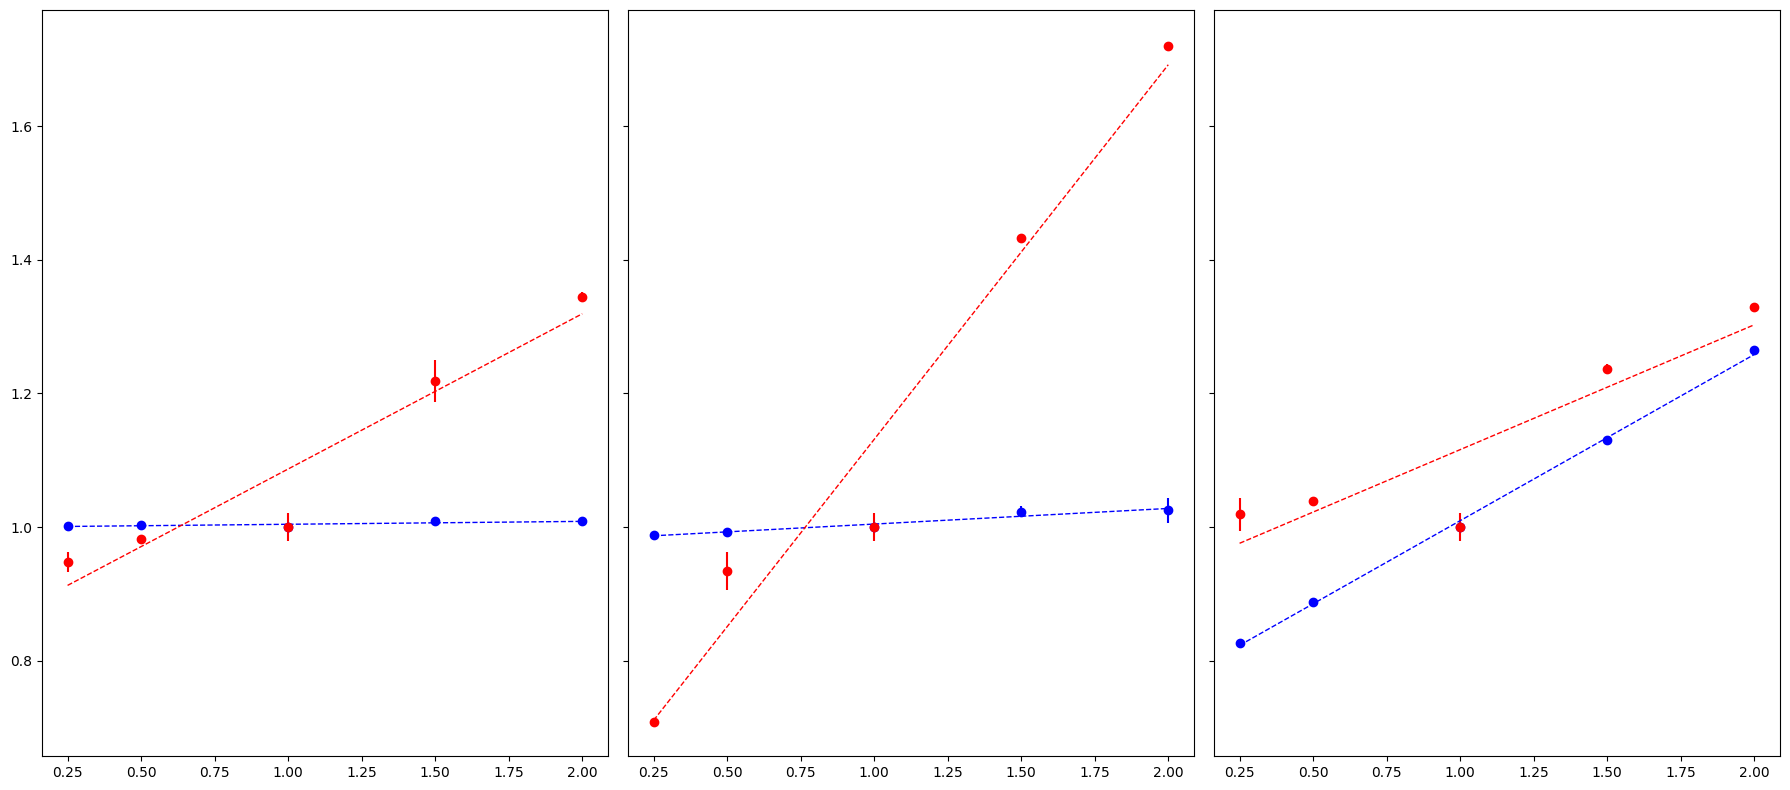

In [ ]:
# Plot the data points for K1_ratio and K2_ratio
for ax, ion in zip(axs, ions):
    ion_data = ion_stats[ion_stats['Ion'] == ion]
    
    # Plot K1_ratio points
    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K1_ratio_mean'], 
                yerr=ion_data['K1_ratio_std'], fmt='o', color='blue', label=f'{ion} K1 Ratio')
    
    # Plot K2_ratio points
    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K2_ratio_mean'], 
                yerr=ion_data['K2_ratio_std'], fmt='o', color='red', label=f'{ion} K2 Ratio')
    
    # Linear regression for K1_ratio
    X = ion_data['Concentration Multiplier'].values.reshape(-1, 1)
    y_k1 = ion_data['K1_ratio_mean'].values
    model_k1 = LinearRegression().fit(X, y_k1)
    y_k1_pred = model_k1.predict(X)
    ax.plot(ion_data['Concentration Multiplier'], y_k1_pred, linestyle='--', linewidth=1, color='blue', label=f'{ion} K1 Ratio Regression')
    
    # Linear regression for K2_ratio
    y_k2 = ion_data[('K2_ratio_mean')].values
    model_k2 = LinearRegression().fit(X, y_k2)
    y_k2_pred = model_k2.predict(X)
    ax.plot(ion_data['Concentration Multiplier'], y_k2_pred, linestyle='--', linewidth=1, color='red', label=f'{ion} K2 Ratio Regression')

# Adjust layout
plt.tight_layout()
plt.show()



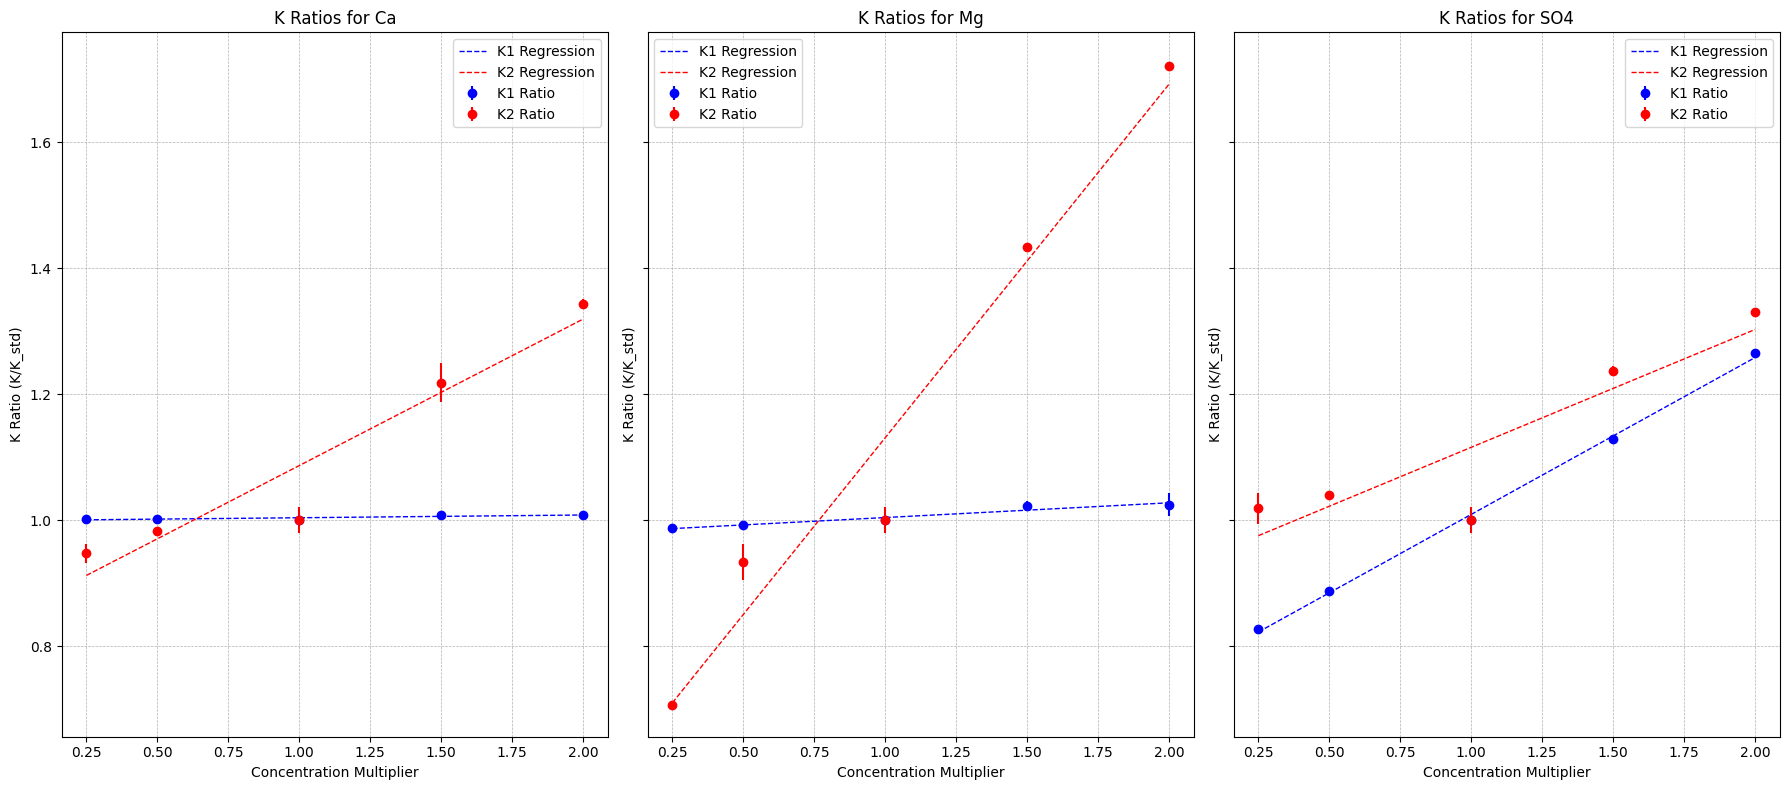

In [172]:
pymyami = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/pymyami.xlsx')
# ax.plot(pymyami['Concentration Multiplier'], pymyami['K2'], linestyle='-', linewidth=1, color='black', label='pymyami K2')


# Create subplots
# fig, axs = plt.subplots(len(ions), 1, figsize=(8, 6 * len(ions)), sharex=True)


# Plot pymyami K1 and K2 data as dashed lines for each ion
for ion in ions:
    pymyami_ion_data = pymyami[pymyami['Ion'] == ion]
    if not pymyami_ion_data.empty:
        ax.plot(pymyami_ion_data['Concentration Multiplier'], pymyami_ion_data['K1'], 
                linestyle='--', linewidth=1, color='blue', label=f'{ion} pymyami K1')
        ax.plot(pymyami_ion_data['Concentration Multiplier'], pymyami_ion_data['K2'], 
                linestyle='--', linewidth=1, color='red', label=f'{ion} pymyami K2')

fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 8), sharey=True)


if len(ions) == 1:
    axs = [axs]  # Ensure axs is iterable if there's only one ion

# Plot with linear regression
for ax, ion in zip(axs, ions):
    ion_data = ion_stats[ion_stats['Ion'] == ion]

    # Extract values
    X = ion_data['Concentration Multiplier'].values.reshape(-1, 1)
    
    # Linear regression for K1_ratio
    y_k1 = ion_data['K1_ratio_mean'].values
    model_k1 = LinearRegression().fit(X, y_k1)
    y_k1_pred = model_k1.predict(X)
    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K1_ratio_mean'], 
                yerr=ion_data['K1_ratio_std'], fmt='o', color='blue', label=f'K1 Ratio')
    ax.plot(ion_data['Concentration Multiplier'], y_k1_pred, linestyle='--', linewidth=1, color='blue', label=f'K1 Regression')
    

    # Linear regression for K2_ratio
    y_k2 = ion_data['K2_ratio_mean'].values
    model_k2 = LinearRegression().fit(X, y_k2)
    y_k2_pred = model_k2.predict(X)
    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K2_ratio_mean'], 
                yerr=ion_data['K2_ratio_std'], fmt='o', color='red', label=f'K2 Ratio')
    ax.plot(ion_data['Concentration Multiplier'], y_k2_pred, linestyle='--', linewidth=1, color='red', label=f'K2 Regression')

    ax.set_xlabel("Concentration Multiplier")
    ax.set_ylabel("K Ratio (K/K_std)")
    ax.set_title(f"K Ratios for {ion}")
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()



In [248]:

# Load data
pymyami = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/pymyami.xlsx')


# Define ions (ensure it's a list of unique ion names)
ions = pymyami['Ion'].unique()

# Create subplots
fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 8), sharey=True)

# Ensure axs is iterable if there's only one ion
if len(ions) == 1:
    axs = [axs]

# Iterate over ions
for ax, ion in zip(axs, ions):
    # Filter data
    pymyami_ion_data = pymyami[pymyami['Ion'] == ion]
    
    # Plot pymyami K1 and K2 as dashed lines
    ax.plot(pymyami_ion_data['Concentration Multiplier'], pymyami_ion_data['K1'], 
            linestyle='-', linewidth=1, color='blue', label='pymyami K1 ratio')
    ax.plot(pymyami_ion_data['Concentration Multiplier'], pymyami_ion_data['K2'], 
            linestyle='-', linewidth=1, color='red', label='pymyami K2 ratio')

    # Ensure ion_stats is defined
    if 'ion_stats' in locals():
        ion_data = ion_stats[ion_stats['Ion'] == ion]

        # Extract values
        X = ion_data['Concentration Multiplier'].values.reshape(-1, 1)

        # Linear regression for K1_ratio
        y_k1 = ion_data['K1_ratio_mean'].values
        model_k1 = LinearRegression().fit(X, y_k1)
        y_k1_pred = model_k1.predict(X)
        ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K1_ratio_mean'], 
                    yerr=ion_data['K1_ratio_std'], fmt='o', color='blue', label='K1 Ratio')
        ax.plot(ion_data['Concentration Multiplier'], y_k1_pred, linestyle='--', linewidth=1, color='blue', label='K1 Regression')

        # Linear regression for K2_ratio
        y_k2 = ion_data['K2_ratio_mean'].values
        model_k2 = LinearRegression().fit(X, y_k2)
        y_k2_pred = model_k2.predict(X)
        ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K2_ratio_mean'], 
                    yerr=ion_data['K2_ratio_std'], fmt='o', color='red', label='K2 Ratio')
        ax.plot(ion_data['Concentration Multiplier'], y_k2_pred, linestyle='--', linewidth=1, color='red', label='K2 Regression')

    # Formatting
    ax.set_xlabel("Concentration Multiplier")
    ax.set_ylabel("K Ratio (K/K_std)")
    ax.set_title(f"K Ratios for {ion}")
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cameronrichardson/Documents/Thesis/code/data/pymyami.xlsx'

KeyError: 'Concentration Multiplier'

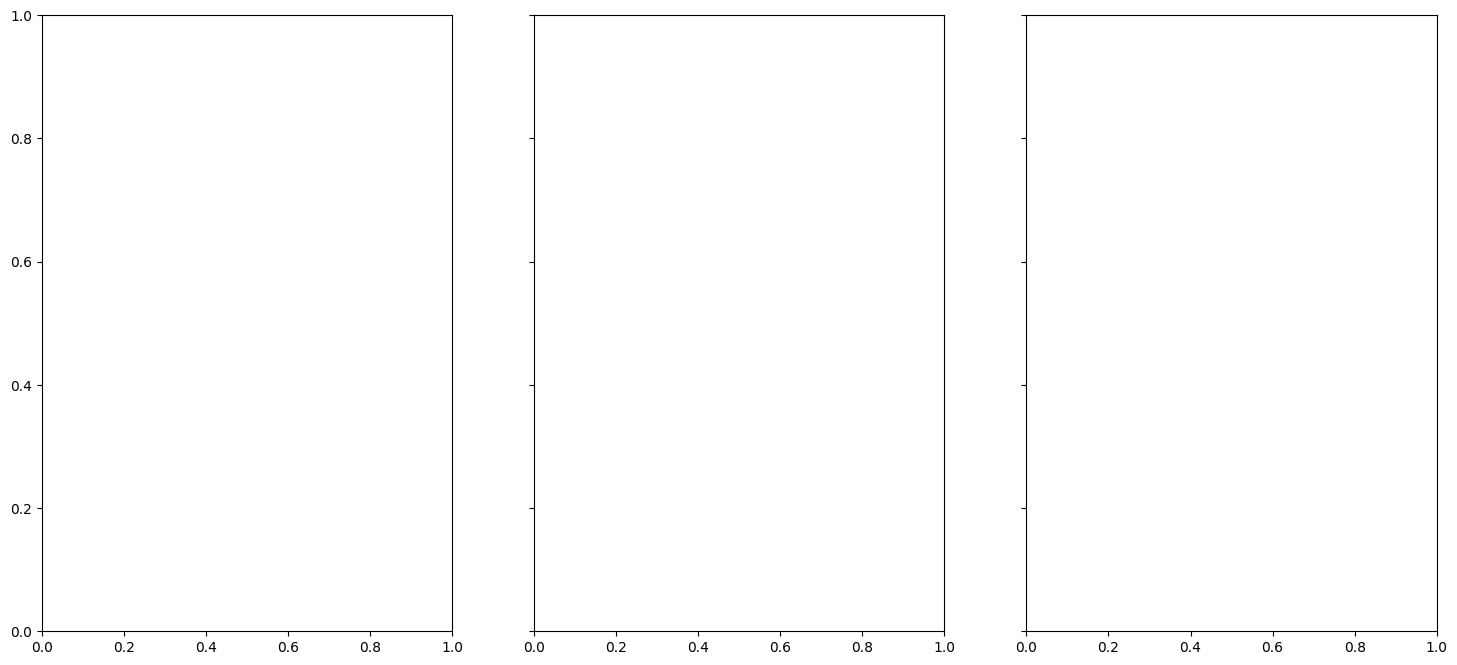

In [247]:
fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 8), sharey=True)
# Iterate over ions
for ax, ion in zip(axs, ions):
    # Filter data
    pymyami_ion_data = pymyami[pymyami['Ion'] == ion]
    
    # Plot pymyami K1 and K2 as dashed lines
    ax.plot(pymyami_ion_data['Concentration Multiplier'], pymyami_ion_data['K1'], 
            linestyle='dotted', linewidth=1, color='blue', label='Pymyami K1')
    ax.plot(pymyami_ion_data['Concentration Multiplier'], pymyami_ion_data['K2'], 
            linestyle='dotted', linewidth=1, color='red', label='Pymyami K2')

    # Ensure MP_pitzer_stats is defined
    if 'MP_pitzer_stats' in locals():
        mp_ion_data = MP_pitzer_stats[MP_pitzer_stats['Ion'] == ion]

        # Plot MP_pitzer K1_ratio_mean and K2_ratio_mean as solid black lines
        ax.plot(mp_ion_data['Concentration Multiplier'], mp_ion_data['K1_ratio_mean'], 
                linestyle='dashdot', linewidth=1, color='blue', label='MP Pitzer K1')
        ax.plot(mp_ion_data['Concentration Multiplier'], mp_ion_data['K2_ratio_mean'], 
                linestyle='dashdot', linewidth=1, color='red', label='MP Pitzer K2')
    # Ensure ion_stats is defined
    if 'ion_stats' in locals():
        ion_data = ion_stats[ion_stats['Ion'] == ion]

        # Extract values
        X = ion_data['Concentration Multiplier'].values.reshape(-1, 1)

        # Linear regression for K1_ratio
        y_k1 = ion_data['K1_ratio_mean'].values
        model_k1 = LinearRegression().fit(X, y_k1)
        y_k1_pred = model_k1.predict(X)
        ax.plot(ion_data['Concentration Multiplier'], y_k1_pred, linestyle='-', linewidth=1, color='blue', label='K1 Regression')
        ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K1_ratio_mean'], 
                    yerr=ion_data['K1_ratio_std'], fmt='o', color='blue', label='K1 Ratio')
        

        # Linear regression for K2_ratio
        y_k2 = ion_data['K2_ratio_mean'].values
        model_k2 = LinearRegression().fit(X, y_k2)
        y_k2_pred = model_k2.predict(X)
        ax.plot(ion_data['Concentration Multiplier'], y_k2_pred, linestyle='-', linewidth=1, color='red', label='K2 Regression')
        ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K2_ratio_mean'], 
                    yerr=ion_data['K2_ratio_std'], fmt='o', color='red', label='K2 Ratio')
        



    # Formatting
    ax.set_xlabel("Concentration Multiplier")
    ax.set_ylabel("K Ratio (K/K_std)")
    ax.set_title(f"K Ratios for {ion}")
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()



# Filter data for Mg
mg_data = ion_stats[ion_stats['Ion'] == 'Mg']
pymyami_mg = pymyami[pymyami['Ion'] == 'Mg']
mp_mg_data = MP_pitzer_stats[MP_pitzer_stats['Ion'] == 'Mg']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the average K1 ratios for Mg as a line
ax.plot(mg_data['Concentration Multiplier'], mg_data['K1_ratio_mean'], 
        linestyle='-', color='blue', label='Avg Measured K1 Ratio')

# Overlay the model data for K1 ratios (Pymyami)
ax.plot(pymyami_mg['Concentration Multiplier'], pymyami_mg['K1'], 
        linestyle='--', color='red', label='Model K1 Ratio (Pymyami)')

# Overlay the MP Pitzer data for K1 ratios
ax.plot(mp_mg_data['Concentration Multiplier'], mp_mg_data['K1_ratio_mean'], 
        linestyle='-.', color='green', label='Model K1 Ratio (MP Pitzer)')

# Set labels and title
ax.set_xlabel('Concentration Multiplier')
ax.set_ylabel('K1 Ratio (K/K_std)')
ax.set_title('K1 Ratios for Mg')
ax.legend()
ax.grid(True, linestyle="--", linewidth=0.5)

# Show plot
plt.show()


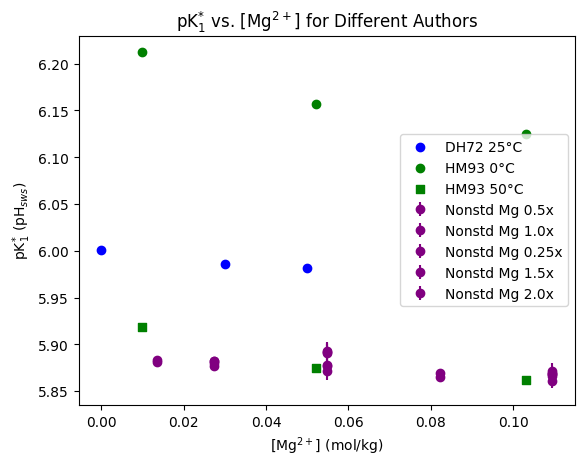

In [ ]:
###### Model pK1, pK2 vals

DH72 = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/dyrssen_hansson1972_data.xlsx')
HM93 = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/he_morse1993_data.xlsx')
nonstd = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/data/02102025titration_master copy.xlsx', sheet_name='nonStandard')
# TM92 = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/thurmond_millero1982_data.xlsx')
# Filter data to include only rows with the same temperature
# Create a figure and axis
fig, ax = plt.subplots()
# Plot nonstd magnesium data

for temp in nonstd_mg['Concentration Multiplier'].unique():
    temp_data = nonstd_mg[nonstd_mg['Concentration Multiplier'] == temp]
    ax.errorbar(temp_data['Concentration'], temp_data['pK1'], 
                yerr=temp_data['pK1_std_pk1'], fmt='o', label=f'Nonstd Mg {temp}x', color='purple')
# Filter out data with temperature 90°C
HM93 = HM93[HM93['T(c)'] != 90]
HM93 = HM93[HM93['T(c)'] != 75]
# Define markers for each temperature
markers = {25: 'o', 50: 's', 75: 'D'}

# Plot pK1 values for each dataset with different markers for temperature
for author, data, color in zip(['DH72', 'HM93'], [DH72, HM93], colors.values()):
    if not data.empty:
        for temp in data['T(c)'].unique():
            temp_data = data[data['T(c)'] == temp]
            ax.scatter(temp_data['m_Mg'], temp_data['pK1*'], label=f'{author} {temp}°C', color=color, marker=markers.get(temp, 'o'))

# Set labels and title
ax.set_xlabel('[Mg$^{2+}$] (mol/kg)')
ax.set_ylabel('pK$^{*}_{1}$ (pH$_{sws}$)')
ax.set_title('pK$^{*}_{1}$ vs. [Mg$^{2+}$] for Different Authors')

# Add legend
ax.legend(loc='best')

# Show plot
plt.show()


In [156]:
from pymyami import calculate_seawater_correction, approximate_seawater_correction

calculate_seawater_correction(TempC=20, Sal=35, Mg=0.054692495, Ca=0.01074435, SO4=0.00731830625)

/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/pymyami/params.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return a[0] + a[1] / TK + a[2] * 1e-4 * TK + a[3] * 1e-4 * TKsub + a[4] * 1e-6 * TKsub**2
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/pymyami/params.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return a[0] + a[1] / TK + a[2] * 1e-4 * TK + a[3] * 1e-4 * TKsub + a[4] * 1e-6 * TKsub**2
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/pymyami/params.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

{'KspC': np.float64(1.0065995926204991),
 'KspA': np.float64(1.0065995926204991),
 'K1': np.float64(0.8492076741753076),
 'K2': np.float64(0.859732339370669),
 'KW': np.float64(0.8535282633817639),
 'KB': np.float64(0.8602906597363544),
 'K0': np.float64(1.0064435595913694),
 'KS': np.float64(0.8561387542832952)}

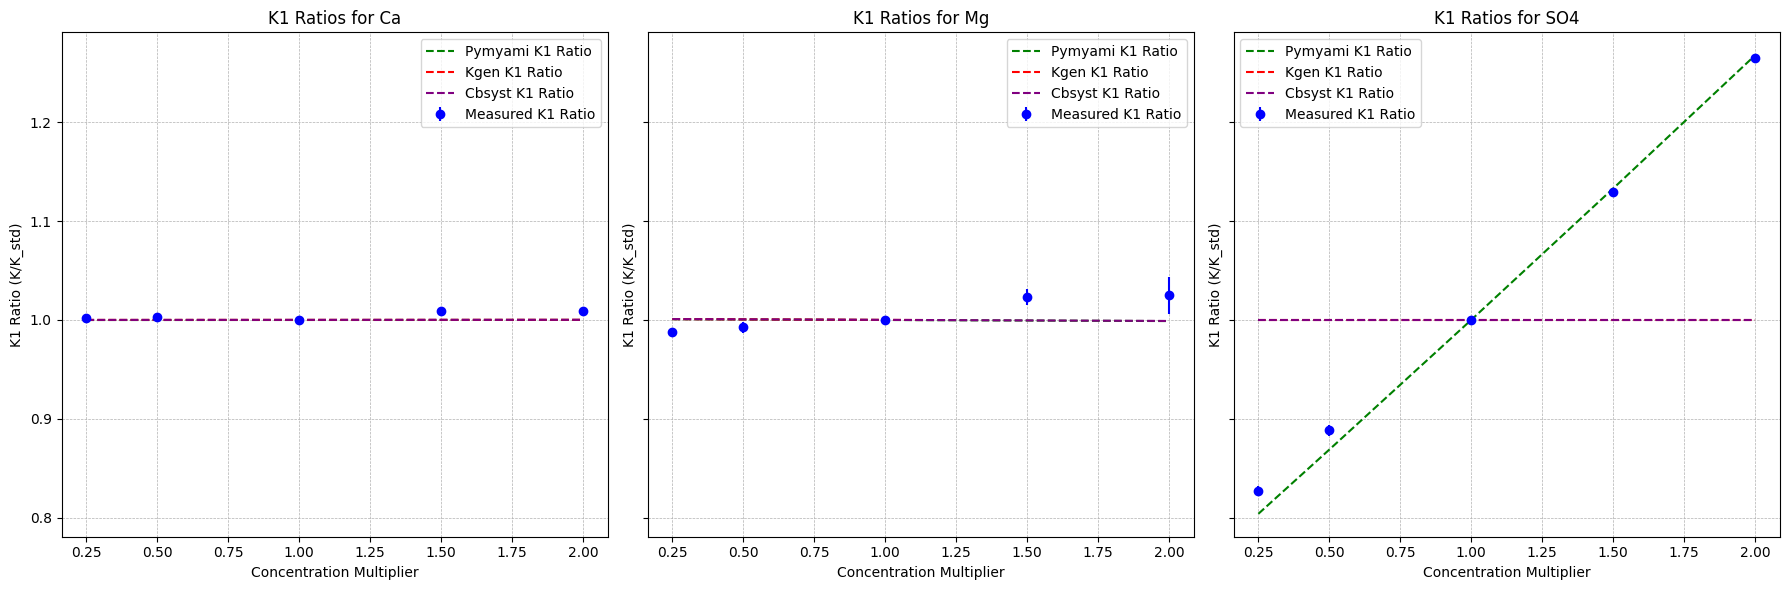

In [ ]:
cbsyst = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/cbsyst_data.xlsx')
pymyami = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/pymyami_data.xlsx')
kgen = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/kgen_data.xlsx')


ion_data



# Create subplots for each ion
fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 6), sharey=True)

# Ensure axs is iterable if there's only one ion
if len(ions) == 1:
    axs = [axs]

# Iterate over ions
for ax, ion in zip(axs, ions):
    # Filter data for the current ion
    ion_data = ion_stats[ion_stats['Ion'] == ion]
    pymyami_ion_data = pymyami[pymyami['Ion'] == ion]
    mp_ion_data = MP_pitzer_stats[MP_pitzer_stats['Ion'] == ion]
    kgen_ion_data = kgen[kgen['Ion'] == ion]
    cbsyst_ion_data = cbsyst[cbsyst['Ion'] == ion]

    # Filter data for 20 degrees
    pymyami_ion_data = pymyami_ion_data[pymyami_ion_data['Temperature'] == 30]
    kgen_ion_data = kgen_ion_data[kgen_ion_data['Temperature'] == 30]
    cbsyst_ion_data = cbsyst_ion_data[cbsyst_ion_data['Temperature'] == 30]

    pymyami_ion_data = pymyami_ion_data[pymyami_ion_data['Salinity'] == 35]
    kgen_ion_data = kgen_ion_data[kgen_ion_data['Salinity'] == 35]
    cbsyst_ion_data = cbsyst_ion_data[cbsyst_ion_data['Salinity'] == 35]

    # Plot K1 ratios for ion_stats
    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K1_ratio_mean'], 
                yerr=ion_data['K1_ratio_std'], fmt='o', color='blue', label='Measured K1 Ratio')

    # Plot K1 ratios for pymyami
    if not pymyami_ion_data.empty:
        ax.plot(pymyami_ion_data['Concentration Multiple'], pymyami_ion_data['K1 ratio'], 
                linestyle='--', color='green', label='Pymyami K1 Ratio')

    # Plot K1 ratios for kgen
    if not kgen_ion_data.empty:
        ax.plot(kgen_ion_data['Concentration Multiple'], kgen_ion_data['K1 ratio'], 
                linestyle='--', color='red', label='Kgen K1 Ratio')
    
    # Plot K1 ratios for kgen
    if not cbsyst_ion_data.empty:
        ax.plot(cbsyst_ion_data['Concentration Multiple'], cbsyst_ion_data['K1 ratio'], 
                linestyle='--', color='purple', label='Cbsyst K1 Ratio')

    # Formatting
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('K1 Ratio (K/K_std)')
    ax.set_title(f'K1 Ratios for {ion}')
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()



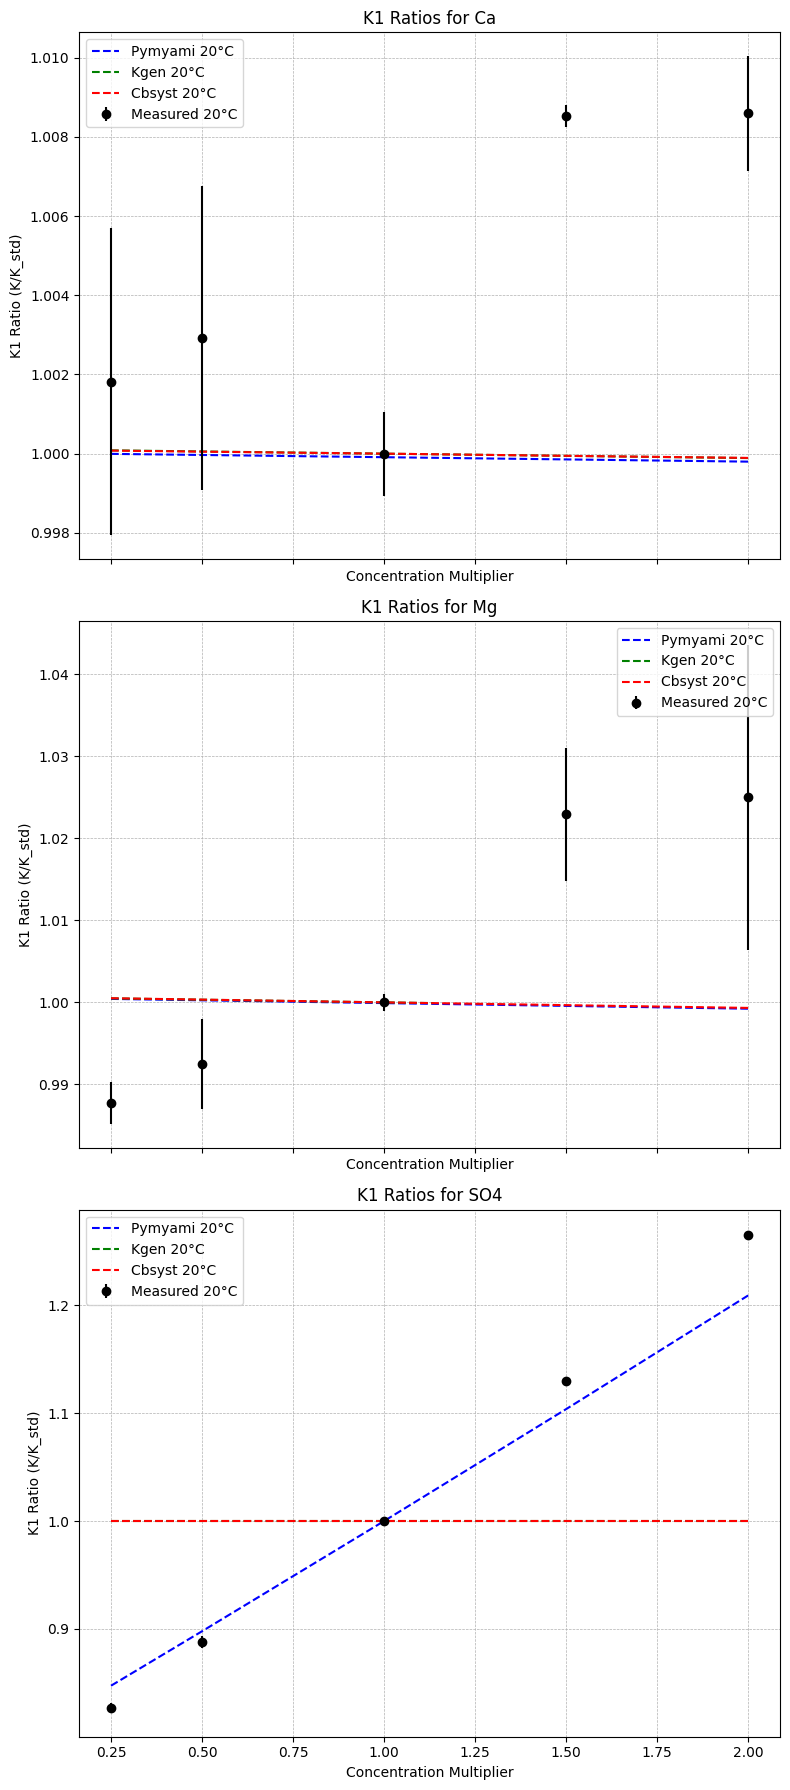

In [221]:
cbsyst = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/cbsyst_data.xlsx')
pymyami = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/pymyami_data.xlsx')
kgen = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/kgen_data.xlsx')

# Create subplots for each ion
fig, axs = plt.subplots(len(ions), 1, figsize=(8, 6 * len(ions)), sharex=True)

# Ensure axs is iterable if there's only one ion
if len(ions) == 1:
    axs = [axs]

# Iterate over ions
for ax, ion in zip(axs, ions):
    # Filter data for the current ion
    ion_data = ion_stats[ion_stats['Ion'] == ion]
    pymyami_ion_data = pymyami[pymyami['Ion'] == ion]
    mp_ion_data = MP_pitzer_stats[MP_pitzer_stats['Ion'] == ion]
    kgen_ion_data = kgen[kgen['Ion'] == ion]
    cbsyst_ion_data = cbsyst[cbsyst['Ion'] == ion]

    # Filter data for 10, 20, 30 degrees and salinity 35
    pymyami_ion_data = pymyami_ion_data[(pymyami_ion_data['Temperature'].isin([20])) & (pymyami_ion_data['Salinity'] == 35)]
    kgen_ion_data = kgen_ion_data[(kgen_ion_data['Temperature'].isin([20])) & (kgen_ion_data['Salinity'] == 35)]
    cbsyst_ion_data = cbsyst_ion_data[(cbsyst_ion_data['Temperature'].isin([20])) & (cbsyst_ion_data['Salinity'] == 35)]

    # Define line styles for different temperatures
    line_styles = {10: 'dotted', 20: 'dashed', 30: 'solid'}

    # Define colors for each author
    author_colors = {'Pymyami': 'blue', 'Kgen': 'green', 'Cbsyst': 'red'}

    # Iterate over authors and plot data
    for author, data, color in zip(['Pymyami', 'Kgen', 'Cbsyst'], [pymyami_ion_data, kgen_ion_data, cbsyst_ion_data], author_colors.values()):
        for temp in [10, 20, 30]:
            temp_data = data[data['Temperature'] == temp]
            if not temp_data.empty:
                ax.plot(temp_data['Concentration Multiple'], temp_data['K1 ratio'], 
                        linestyle=line_styles[temp], color=color, label=f'{author} {temp}°C')

    
    # pymyami_ion_data = pymyami_ion_data[(pymyami_ion_data['Temperature'] == 30) & (pymyami_ion_data['Salinity'] == 35)]
    # kgen_ion_data = kgen_ion_data[(kgen_ion_data['Temperature'] == 30) & (kgen_ion_data['Salinity'] == 35)]
    # cbsyst_ion_data = cbsyst_ion_data[(cbsyst_ion_data['Temperature'] == 30) & (cbsyst_ion_data['Salinity'] == 35)]

    # Plot K1 ratios for ion_stats
    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K1_ratio_mean'], 
                yerr=ion_data['K1_ratio_std'], fmt='o', color='black', label='Measured 20°C')

    # # Plot K1 ratios for pymyami
    # if not pymyami_ion_data.empty:
    #     ax.plot(pymyami_ion_data['Concentration Multiple'], pymyami_ion_data['K1 ratio'], 
    #             linestyle='--', color='green', label='Pymyami K1 Ratio')

    # # Plot K1 ratios for kgen
    # if not kgen_ion_data.empty:
    #     ax.plot(kgen_ion_data['Concentration Multiple'], kgen_ion_data['K1 ratio'], 
    #             linestyle='--', color='red', label='Kgen K1 Ratio')
    
    # # Plot K1 ratios for cbsyst
    # if not cbsyst_ion_data.empty:
    #     ax.plot(cbsyst_ion_data['Concentration Multiple'], cbsyst_ion_data['K1 ratio'], 
    #             linestyle='--', color='purple', label='Cbsyst K1 Ratio')

    # Formatting
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('K1 Ratio (K/K_std)')
    ax.set_title(f'K1 Ratios for {ion}')
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


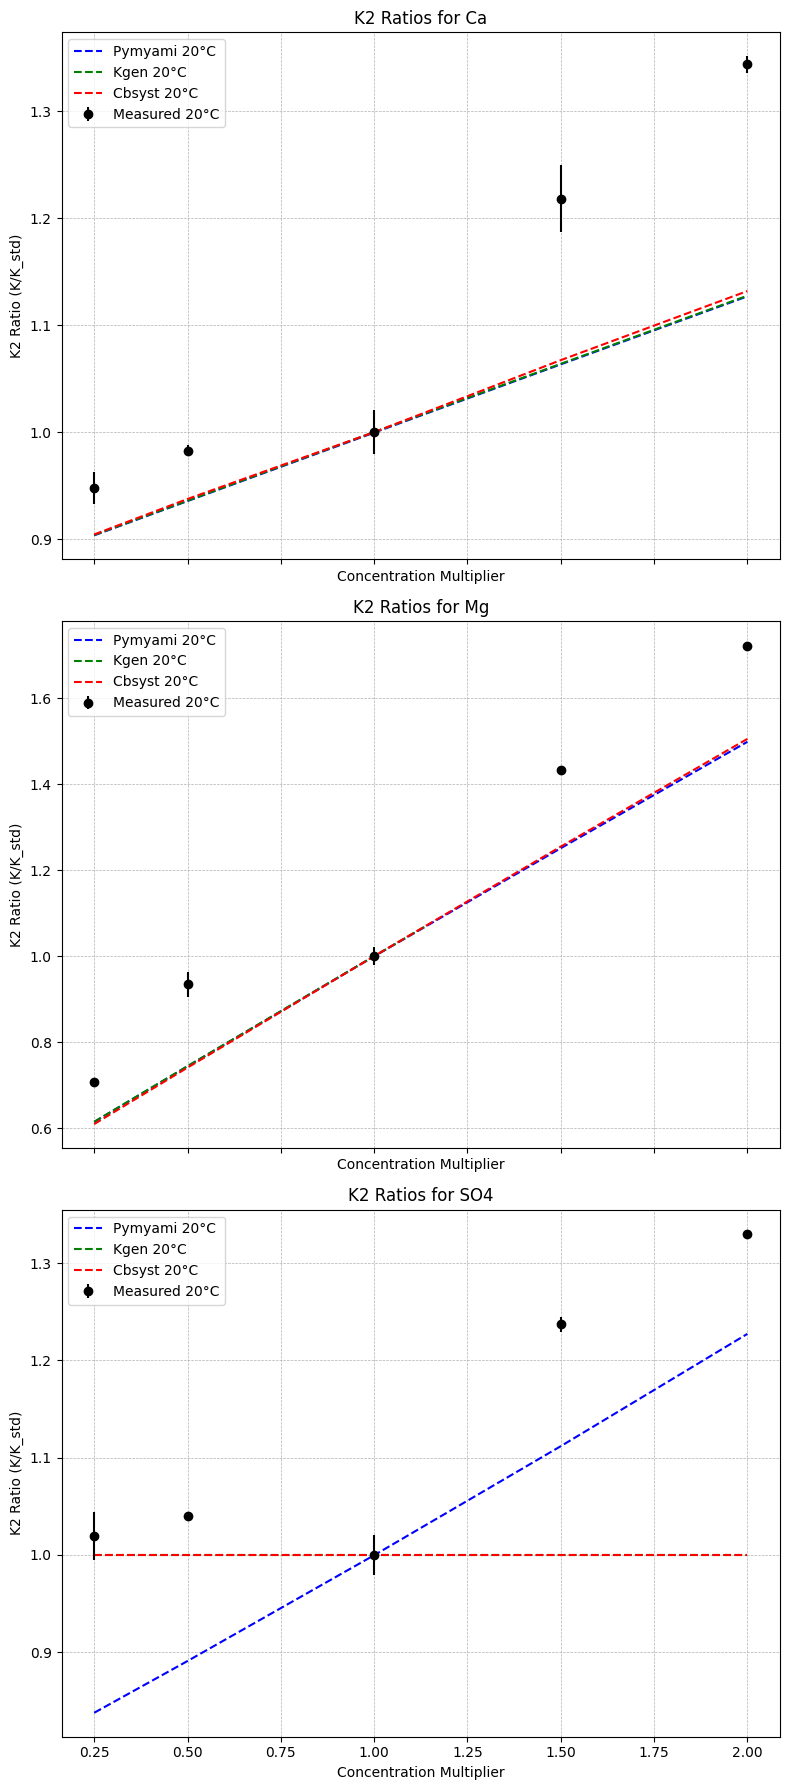

In [228]:
fig, axs = plt.subplots(len(ions), 1, figsize=(8, 6 * len(ions)), sharex=True)
# Replace K1 with K2 in the calculations and plotting
for ax, ion in zip(axs, ions):
    # Filter data for the current ion
    ion_data = ion_stats[ion_stats['Ion'] == ion]
    pymyami_ion_data = pymyami[pymyami['Ion'] == ion]
    mp_ion_data = MP_pitzer_stats[MP_pitzer_stats['Ion'] == ion]
    kgen_ion_data = kgen[kgen['Ion'] == ion]
    cbsyst_ion_data = cbsyst[cbsyst['Ion'] == ion]

    # Filter data for 10, 20, 30 degrees and salinity 35
    pymyami_ion_data = pymyami_ion_data[(pymyami_ion_data['Temperature'].isin([20])) & (pymyami_ion_data['Salinity'] == 35)]
    kgen_ion_data = kgen_ion_data[(kgen_ion_data['Temperature'].isin([20])) & (kgen_ion_data['Salinity'] == 35)]
    cbsyst_ion_data = cbsyst_ion_data[(cbsyst_ion_data['Temperature'].isin([20])) & (cbsyst_ion_data['Salinity'] == 35)]

    # Define line styles for different temperatures
    line_styles = {10: 'dotted', 20: 'dashed', 30: 'solid'}

    # Define colors for each author
    author_colors = {'Pymyami': 'blue', 'Kgen': 'green', 'Cbsyst': 'red'}

    # Iterate over authors and plot data
    for author, data, color in zip(['Pymyami', 'Kgen', 'Cbsyst'], [pymyami_ion_data, kgen_ion_data, cbsyst_ion_data], author_colors.values()):
        for temp in [10, 20, 30]:
            temp_data = data[data['Temperature'] == temp]
            if not temp_data.empty:
                ax.plot(temp_data['Concentration Multiple'], temp_data['K2 ratio'], 
                        linestyle=line_styles[temp], color=color, label=f'{author} {temp}°C')

    # Plot K2 ratios for ion_stats
    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['K2_ratio_mean'], 
                yerr=ion_data['K2_ratio_std'], fmt='o', color='black', label='Measured 20°C')

    # Formatting
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('K2 Ratio (K/K_std)')
    ax.set_title(f'K2 Ratios for {ion}')
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

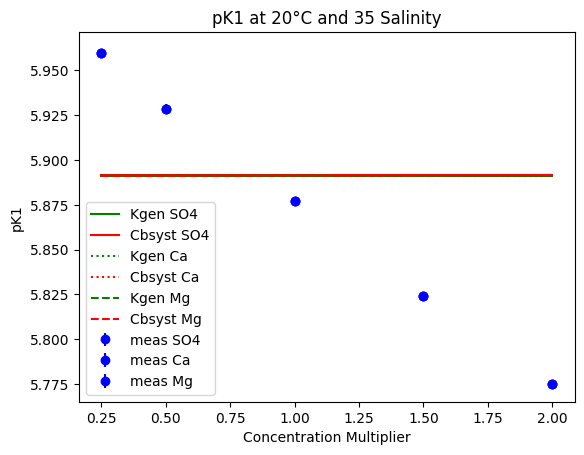

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
cbsyst = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/cbsyst_data.xlsx')
pymyami = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/pymyami_data.xlsx')
kgen = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/kgen_data.xlsx')

# Filter data for 20°C and 35 salinity
cbsyst_filtered = cbsyst[(cbsyst['Temperature'] == 20) & (cbsyst['Salinity'] == 35)]
pymyami_filtered = pymyami[(pymyami['Temperature'] == 20) & (pymyami['Salinity'] == 35)]
kgen_filtered = kgen[(kgen['Temperature'] == 20) & (kgen['Salinity'] == 35)]

# Group data by Ion
cbsyst_grouped = cbsyst_filtered.groupby('Ion')
pymyami_grouped = pymyami_filtered.groupby('Ion')
kgen_grouped = kgen_filtered.groupby('Ion')

# Define line styles and colors
ion_line_styles = {'Ca': 'dotted', 'Mg': 'dashed', 'SO4': 'solid'}
author_colors = {'meas': 'blue', 'Kgen': 'green', 'Cbsyst': 'red'}

# Create a figure
fig, ax = plt.subplots()

# List of unique ions present in the datasets
ions = set(cbsyst_filtered['Ion']).union(set(pymyami_filtered['Ion'])).union(set(kgen_filtered['Ion']))

# Plot data for each ion
for ion in ions:
    # Plot Kgen data
    if ion in kgen_grouped.groups:
        kgen_ion_data = kgen_grouped.get_group(ion)
        ax.plot(kgen_ion_data['Concentration Multiple'], kgen_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Kgen'], 
                label=f'Kgen {ion}')
    
    # Plot Cbsyst data
    if ion in cbsyst_grouped.groups:
        cbsyst_ion_data = cbsyst_grouped.get_group(ion)
        ax.plot(cbsyst_ion_data['Concentration Multiple'], cbsyst_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Cbsyst'], 
                label=f'Cbsyst {ion}')
    
    # # Plot Pymyami data

    ax.errorbar(ion_data['Concentration Multiplier'], ion_data['pK1_mean'], 
                yerr=ion_data['pK1_std'], 
                fmt='o', color=author_colors['meas'], 
                label=f'meas {ion}')

# Set labels and title
ax.set_xlabel('Concentration Multiplier')
ax.set_ylabel('pK1')
ax.set_title('pK1 at 20°C and 35 Salinity')

# Add legend
ax.legend()

# Show plot
plt.show()


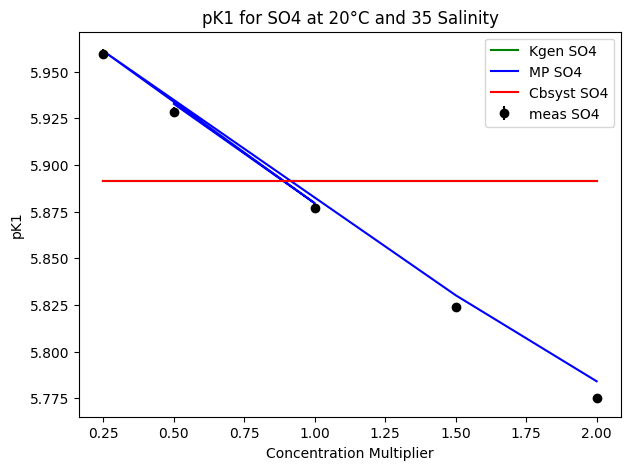

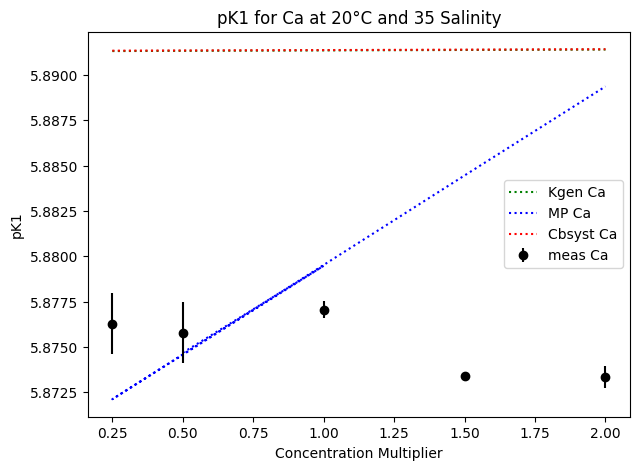

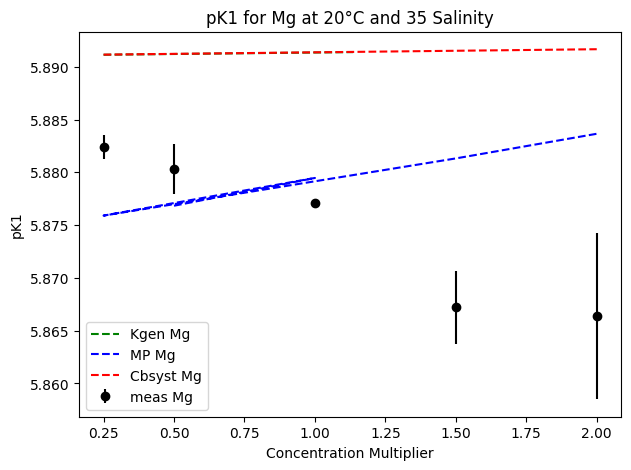

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
cbsyst = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/cbsyst_data.xlsx')
pymyami = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/pymyami_data.xlsx')
kgen = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/kgen_data.xlsx')
MP = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/millero_pierrot_pitzer_data.xlsx')

# Filter data for 20°C and 35 salinity
cbsyst_filtered = cbsyst[(cbsyst['Temperature'] == 20) & (cbsyst['Salinity'] == 35)]
pymyami_filtered = pymyami[(pymyami['Temperature'] == 20) & (pymyami['Salinity'] == 35)]
kgen_filtered = kgen[(kgen['Temperature'] == 20) & (kgen['Salinity'] == 35)]
# Group data by Ion
cbsyst_grouped = cbsyst_filtered.groupby('Ion')
pymyami_grouped = pymyami_filtered.groupby('Ion')
kgen_grouped = kgen_filtered.groupby('Ion')
MP_grouped = MP.groupby('Ion')

# Define line styles and colors
ion_line_styles = {'Ca': 'dotted', 'Mg': 'dashed', 'SO4': 'solid'}
author_colors = {'meas': 'black', 'Kgen': 'green', 'Cbsyst': 'red', 'MP': 'blue'}

# List of unique ions present in the datasets
ions = set(cbsyst_filtered['Ion']).union(set(pymyami_filtered['Ion'])).union(set(kgen_filtered['Ion']).union(set(MP['Ion'])))

# Create separate plots for each ion
for ion in ions:
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Plot Kgen data
    if ion in kgen_grouped.groups:
        kgen_ion_data = kgen_grouped.get_group(ion)
        ax.plot(kgen_ion_data['Concentration Multiple'], kgen_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Kgen'], 
                label=f'Kgen {ion}')
    
    if ion in MP_grouped.groups:
        MP_ion_data = MP_grouped.get_group(ion)
        ax.plot(MP_ion_data['Concentration Multiplier'], MP_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['MP'], 
                label=f'MP {ion}')

    # Plot Cbsyst data
    if ion in cbsyst_grouped.groups:
        cbsyst_ion_data = cbsyst_grouped.get_group(ion)
        ax.plot(cbsyst_ion_data['Concentration Multiple'], cbsyst_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Cbsyst'], 
                label=f'Cbsyst {ion}')
    
    # Plot Pymyami data with error bars
    if ion in ion_stats['Ion'].unique():
        ion_data = ion_stats[ion_stats['Ion'] == ion]
        ax.errorbar(ion_data['Concentration Multiplier'], ion_data['pK1_mean'], 
                yerr=ion_data['pK1_std'], 
                fmt='o', color=author_colors['meas'], 
                label=f'meas {ion}')

    # Set labels and title
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('pK1')
    ax.set_title(f'pK1 for {ion} at 20°C and 35 Salinity')

    # Add legend
    ax.legend()

    # Show plot
    plt.show()


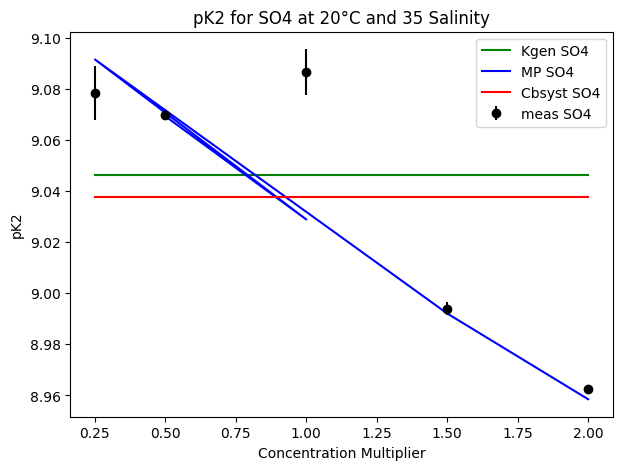

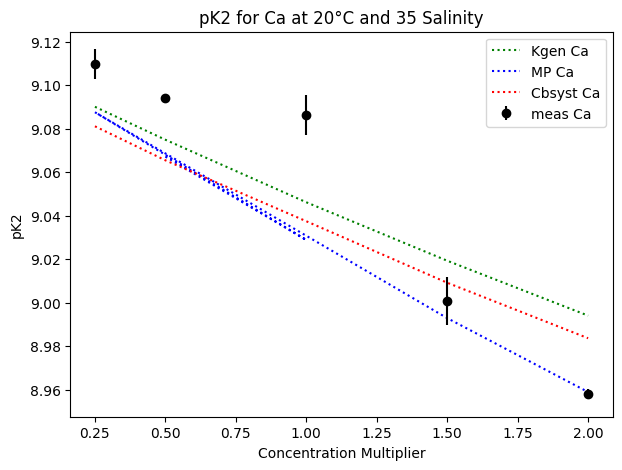

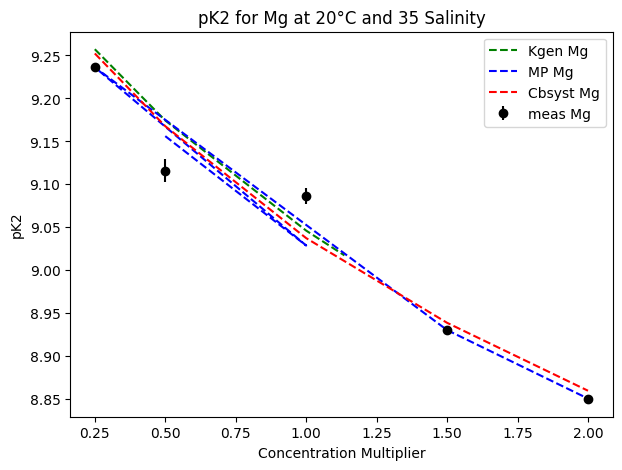

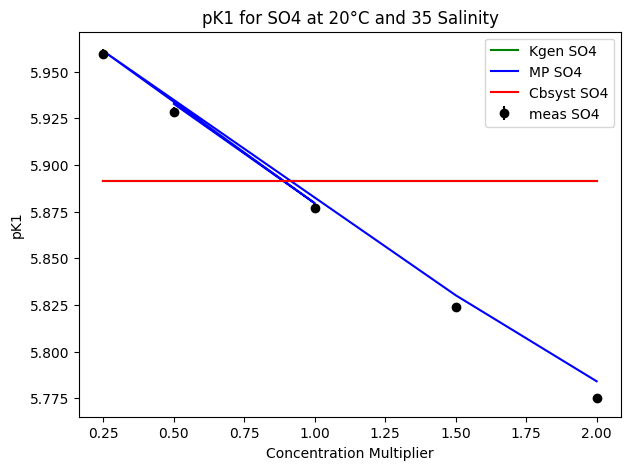

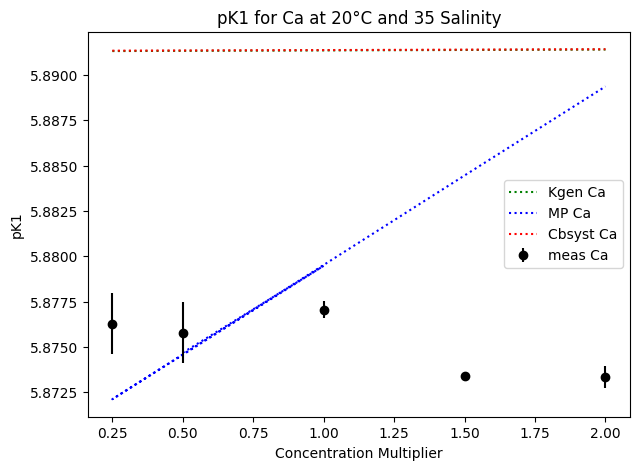

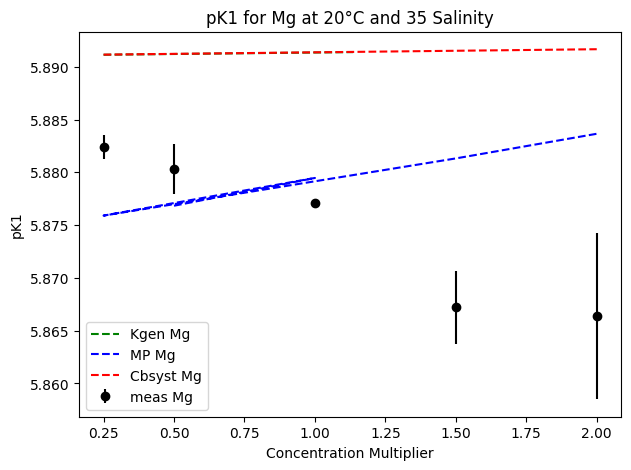

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace pK1 with pK2 in the calculations and plotting
for ion in ions:
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Plot Kgen data
    if ion in kgen_grouped.groups:
        kgen_ion_data = kgen_grouped.get_group(ion)
        ax.plot(kgen_ion_data['Concentration Multiple'], kgen_ion_data['pK2'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Kgen'], 
                label=f'Kgen {ion}')
    
    if ion in MP_grouped.groups:
        MP_ion_data = MP_grouped.get_group(ion)
        ax.plot(MP_ion_data['Concentration Multiplier'], MP_ion_data['pK2'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['MP'], 
                label=f'MP {ion}')

    # Plot Cbsyst data
    if ion in cbsyst_grouped.groups:
        cbsyst_ion_data = cbsyst_grouped.get_group(ion)
        ax.plot(cbsyst_ion_data['Concentration Multiple'], cbsyst_ion_data['pK2'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Cbsyst'], 
                label=f'Cbsyst {ion}')
    
    # Plot Pymyami data with error bars
    if ion in ion_stats['Ion'].unique():
        ion_data = ion_stats[ion_stats['Ion'] == ion]
        ax.errorbar(ion_data['Concentration Multiplier'], ion_data['pK2_mean'], 
                yerr=ion_data['pK2_std'], 
                fmt='o', color=author_colors['meas'], 
                label=f'meas {ion}')

    # Set labels and title
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('pK2')
    ax.set_title(f'pK2 for {ion} at 20°C and 35 Salinity')

    # Add legend
    ax.legend()

    # Show plot
    plt.show()
# Load datasets
cbsyst = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/cbsyst_data.xlsx')
pymyami = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/pymyami_data.xlsx')
kgen = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/kgen_data.xlsx')
MP = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/code/data/K_valuedata/millero_pierrot_pitzer_data.xlsx')

# Filter data for 20°C and 35 salinity
cbsyst_filtered = cbsyst[(cbsyst['Temperature'] == 20) & (cbsyst['Salinity'] == 35)]
pymyami_filtered = pymyami[(pymyami['Temperature'] == 20) & (pymyami['Salinity'] == 35)]
kgen_filtered = kgen[(kgen['Temperature'] == 20) & (kgen['Salinity'] == 35)]
# Group data by Ion
cbsyst_grouped = cbsyst_filtered.groupby('Ion')
pymyami_grouped = pymyami_filtered.groupby('Ion')
kgen_grouped = kgen_filtered.groupby('Ion')
MP_grouped = MP.groupby('Ion')

# Define line styles and colors
ion_line_styles = {'Ca': 'dotted', 'Mg': 'dashed', 'SO4': 'solid'}
author_colors = {'meas': 'black', 'Kgen': 'green', 'Cbsyst': 'red', 'MP': 'blue'}

# List of unique ions present in the datasets
ions = set(cbsyst_filtered['Ion']).union(set(pymyami_filtered['Ion'])).union(set(kgen_filtered['Ion']).union(set(MP['Ion'])))

# Create separate plots for each ion
for ion in ions:
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Plot Kgen data
    if ion in kgen_grouped.groups:
        kgen_ion_data = kgen_grouped.get_group(ion)
        ax.plot(kgen_ion_data['Concentration Multiple'], kgen_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Kgen'], 
                label=f'Kgen {ion}')
    
    if ion in MP_grouped.groups:
        MP_ion_data = MP_grouped.get_group(ion)
        ax.plot(MP_ion_data['Concentration Multiplier'], MP_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['MP'], 
                label=f'MP {ion}')

    # Plot Cbsyst data
    if ion in cbsyst_grouped.groups:
        cbsyst_ion_data = cbsyst_grouped.get_group(ion)
        ax.plot(cbsyst_ion_data['Concentration Multiple'], cbsyst_ion_data['pK1'], 
                linestyle=ion_line_styles.get(ion, 'solid'), 
                color=author_colors['Cbsyst'], 
                label=f'Cbsyst {ion}')
    
    # Plot Pymyami data with error bars
    if ion in ion_stats['Ion'].unique():
        ion_data = ion_stats[ion_stats['Ion'] == ion]
        ax.errorbar(ion_data['Concentration Multiplier'], ion_data['pK1_mean'], 
                yerr=ion_data['pK1_std'], 
                fmt='o', color=author_colors['meas'], 
                label=f'meas {ion}')

    # Set labels and title
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('pK1')
    ax.set_title(f'pK1 for {ion} at 20°C and 35 Salinity')

    # Add legend
    ax.legend()

    # Show plot
    plt.show()


In [84]:


data = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/Experiments/titration data/K_valuedata/expliterature_data.xlsx')

# Define ion list and fixed color mapping for authors
ions = ['Ca', 'Mg', 'SO4']
author_colors = {'RCT95': 'blue', 'PH74': 'green', 'Richardson': 'red', 'TM83': 'purple', "RoyGP_asw": "orange", "DM89": "gold", "pymyami":"black", "kgen":"brown"}

# author_colors = {'Richardson': 'red', "RoyGP_asw": "orange", "DM89": "gold", "pymyami":"black", }


# Get all unique authors in the dataset
unique_authors = data["Author"].unique()





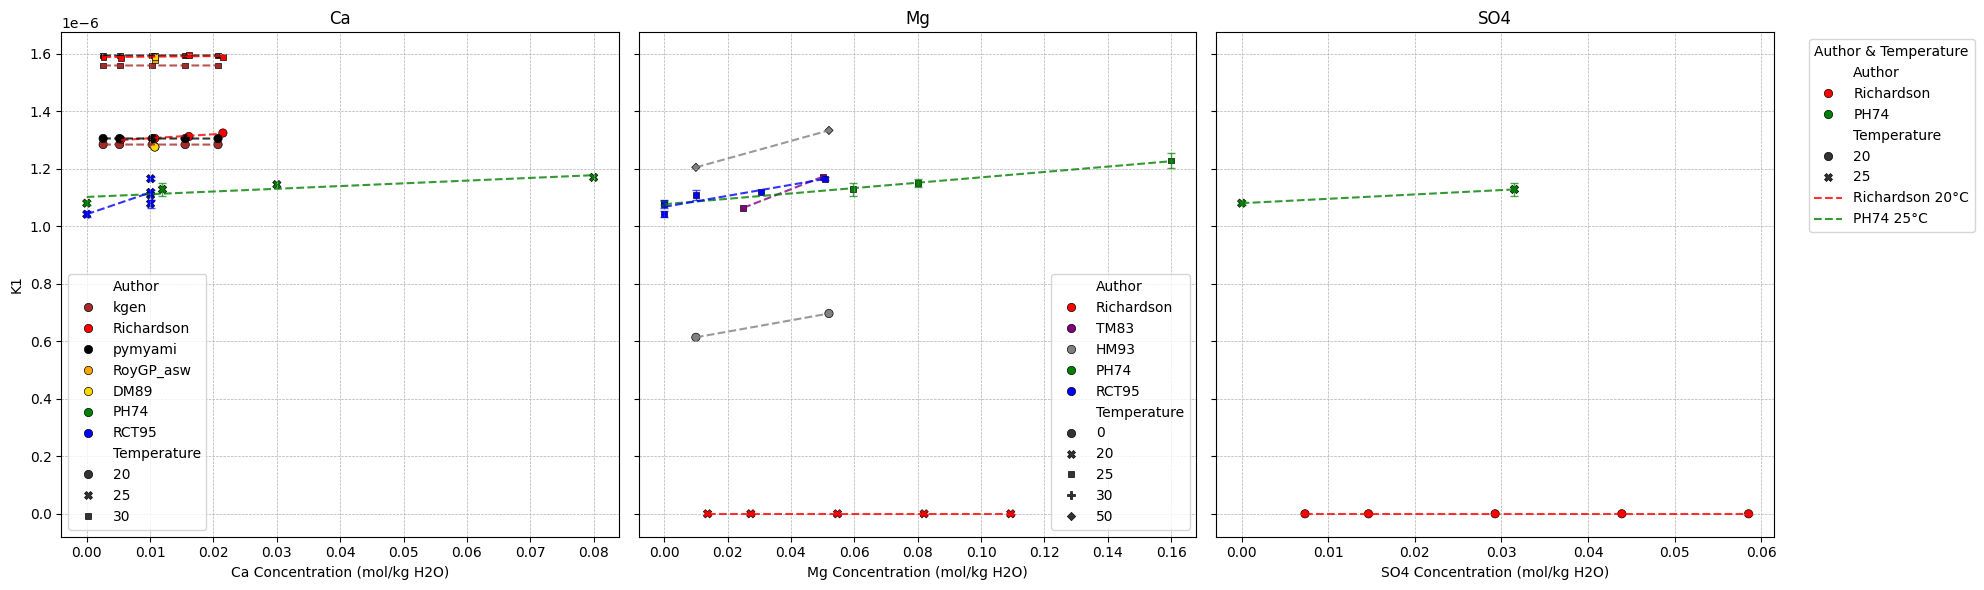


Regression results for Ca at 20°C:
  Author: kgen, Slope: -0.1381050241256401, R²: 1.00000
  Author: Richardson, Slope: 13.827438678794655, R²: 0.93635
  Author: pymyami, Slope: -0.14115517083986653, R²: 1.00000
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan

Regression results for Ca at 30°C:
  Author: kgen, Slope: 0.09975185827463329, R²: 1.00000
  Author: pymyami, Slope: 0.07468254517652693, R²: 1.00000
  Author: Richardson, Slope: 2.00578668818528, R²: 0.11785
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan

Regression results for Ca at 25°C:
  Author: PH74, Slope: 9.449612341967532, R²: 0.77502
  Author: RCT95, Slope: 75.25672463125136, R²: 0.54241


/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


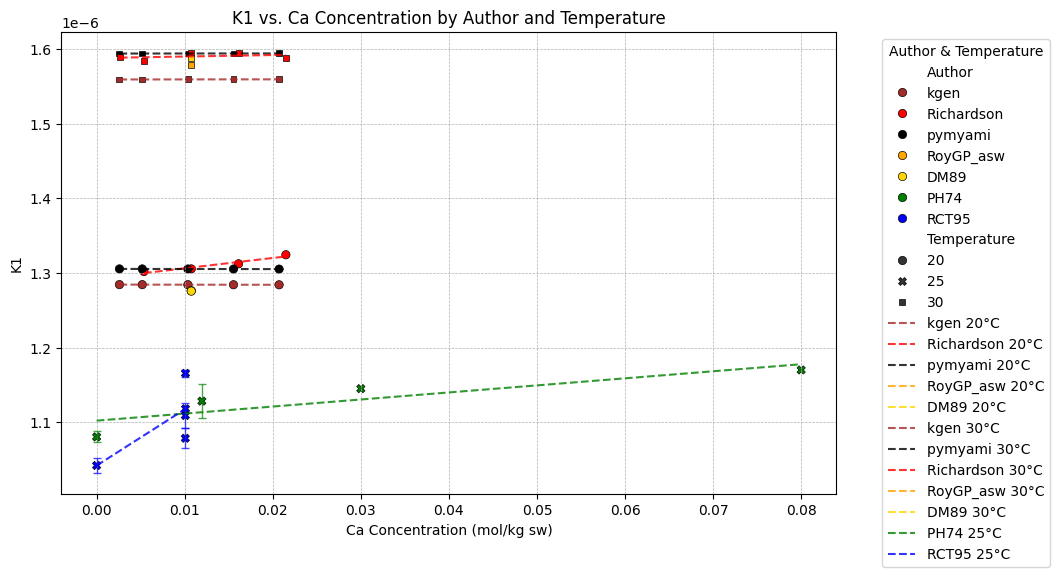


Regression results for Ca:
  Author: PH74, Slope: 9.449612341967532, R²: 0.77502
  Author: RCT95, Slope: 75.25672463125136, R²: 0.54241

Regression results for Mg at 20°C:
  Author: Richardson, Slope: 0.0, R²: 1.00000

Regression results for Mg at 25°C:
  Author: TM83, Slope: 43.220938929525445, R²: 1.00000
  Author: PH74, Slope: 9.339707356505087, R²: 0.99658
  Author: RCT95, Slope: 19.162076862266627, R²: 0.84273

Regression results for Mg at 30°C:

Regression results for Mg at 0°C:
  Author: HM93, Slope: 19.729644987136716, R²: 1.00000

Regression results for Mg at 50°C:
  Author: HM93, Slope: 30.591783759886923, R²: 1.00000


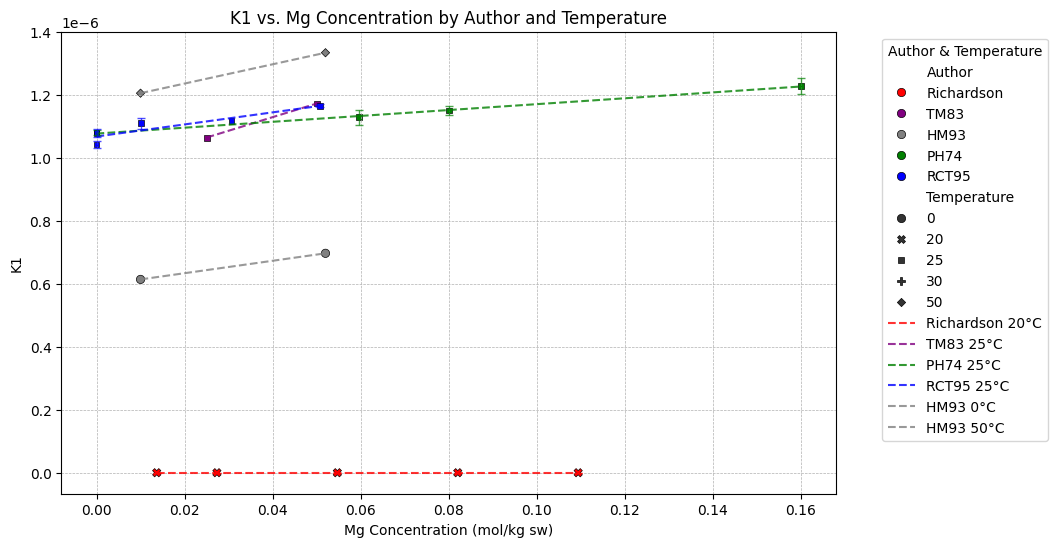


Regression results for Mg:
  Author: HM93, Slope: 30.591783759886923, R²: 1.00000

Regression results for SO4 at 20°C:
  Author: Richardson, Slope: -0.0, R²: 1.00000

Regression results for SO4 at 25°C:
  Author: PH74, Slope: 15.211640211641232, R²: 1.00000


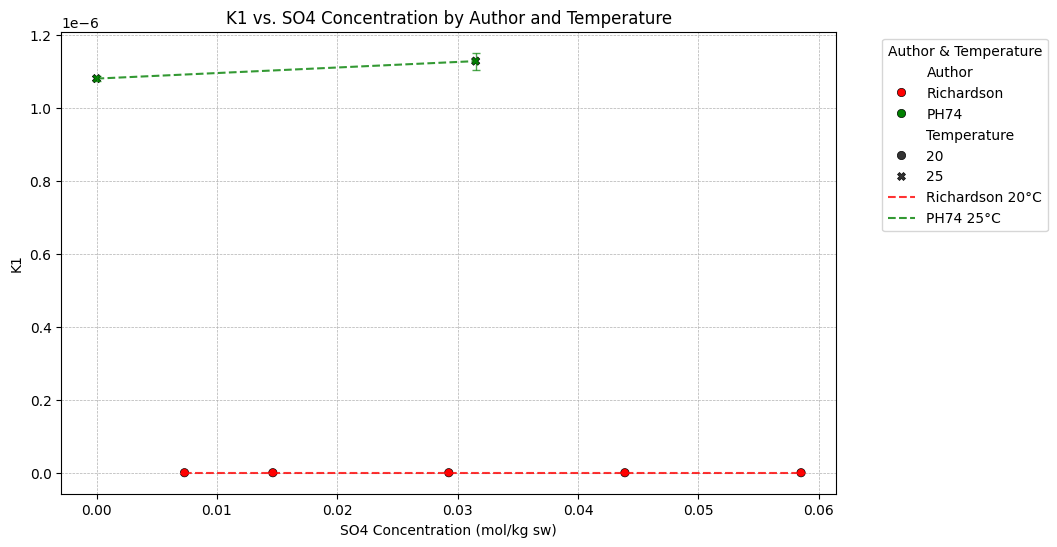


Regression results for SO4:
  Author: PH74, Slope: 15.211640211641232, R²: 1.00000
[20 25]
Empty DataFrame
Columns: [Concentration (molkg H2O), Ion, K1, K1_stdev, K2, K2_stdev, K1K2, K1K2_stdev, Ionic Strength, Salinity, Temperature, Author, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17]
Index: []


In [85]:


# Define a fixed palette mapping all authors in the dataset
palette = {author: author_colors.get(author, 'gray') for author in unique_authors}

# Create subplots for each ion
fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 6), sharey=True)

# Ensure axs is iterable if there's only one ion
if len(ions) == 1:
    axs = [axs]

# Iterate over ions and corresponding axes
for ax, ion in zip(axs, ions):
    df = data[data["Ion"] == ion]

    # Scatter plot
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K1",
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black",
        ax=ax
    )

    # Add linear regression for each author for a given temperature
    for temp in df["Temperature"].unique():
        temp_data = df[df["Temperature"] == temp]
        regression_results_temp = {}

        for author in temp_data["Author"].unique():
            sub_df = temp_data[temp_data["Author"] == author]

            # Drop rows where either 'Concentration (molkg H2O)' or 'K1' are NaN
            sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K1"])

            if len(sub_df) > 0:  # Need at least 2 points for regression
                X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
                y = sub_df["K1"].values

                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)

                # Plot regression line
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                y_range = model.predict(x_range)
                ax.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8, label=f"{author} {temp}°C")

    # Add error bars
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        ax.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K1"], 
            yerr=sub_df["K1_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Formatting
    ax.set_xlabel(f"{ion} Concentration (mol/kg H2O)")
    ax.set_title(f"{ion}")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Set shared y-axis label
axs[0].set_ylabel("K1")

# Adjust layout and add legend
plt.tight_layout()
plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Define a fixed palette mapping all authors in the dataset
palette = {author: author_colors.get(author, 'gray') for author in unique_authors}

for ion in ions:
    df = data[data["Ion"] == ion]

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Scatter plot
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K1",
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black"
    )

    
    # Add linear regression for each author for a given temperature
    for temp in df["Temperature"].unique():
        temp_data = df[df["Temperature"] == temp]
        regression_results_temp = {}

        for author in temp_data["Author"].unique():
            sub_df = temp_data[temp_data["Author"] == author]

            # Drop rows where either 'Concentration (molkg H2O)' or 'K1' are NaN
            sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K1"])

            if len(sub_df) > 0:  # Need at least 2 points for regression
                X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
                y = sub_df["K1"].values

                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)
                
                # Calculate R^2
                r2 = r2_score(y, y_pred)
                slope = model.coef_[0]
                regression_results_temp[author] = (slope, r2)

                # Plot regression line
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                y_range = model.predict(x_range)
                plt.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8, label=f"{author} {temp}°C")

        # Print regression results for the temperature
        print(f"\nRegression results for {ion} at {temp}°C:")
        for author, (slope, r2) in regression_results_temp.items():
            print(f"  Author: {author}, Slope: {slope*10e6}, R²: {r2:.5f}")  
    

    # Add error bars
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        plt.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K1"], 
            yerr=sub_df["K1_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Labels and title
    plt.xlabel(f"{ion} Concentration (mol/kg sw)")
    plt.ylabel("K1")
    plt.title(f"K1 vs. {ion} Concentration by Author and Temperature")
    plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

    # Print regression results
    print(f"\nRegression results for {ion}:")
    for author, (slope, r2) in regression_results_temp.items():
        print(f"  Author: {author}, Slope: {slope*10e6}, R²: {r2:.5f}")
print(df["Temperature"].unique())
print(df[df["Temperature"] == 30])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define a fixed palette mapping all authors in the dataset
fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 6), sharey=True)

# Ensure axs is iterable if there's only one ion
if len(ions) == 1:
    axs = [axs]

# Iterate over ions and corresponding axes
for ax, ion in zip(axs, ions):
    df = data[data["Ion"] == ion]

    # Scatter plot
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K1K2",
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black",
        ax=ax
    )

    # Add linear regression for each author
    regression_results = {}
    
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]

        # Drop rows where either 'Concentration (molkg H2O)' or 'K1K2' are NaN
        sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K1K2"])

        if len(sub_df) > 1:  # Need at least 2 points for regression
            X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
            y = sub_df["K1K2"].values

            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            
            # Calculate R^2
            r2 = r2_score(y, y_pred)
            slope = model.coef_[0]
            regression_results[author] = (slope, r2)

            # Plot regression line
            x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            y_range = model.predict(x_range)
            ax.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8)

    # Add error bars
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        ax.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K1K2"], 
            yerr=sub_df["K1K2_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Formatting
    ax.set_xlabel(f"{ion} Concentration (mol/kg sw)")
    ax.set_title(f"{ion}")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Set shared y-axis label
axs[0].set_ylabel("K1K2")

# Adjust layout and add legend
plt.tight_layout()
plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
palette = {author: author_colors.get(author, 'gray') for author in unique_authors}

for ion in ions:
    df = data[data["Ion"] == ion]

    # Create the plot
  # Create subplots for each ion
    plt.figure(figsize=(10, 6))

    # Scatter plot
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K1K2",
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black"
    )

    # Add linear regression for each author
    regression_results = {}
    
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]

        # Drop rows where either 'Concentration (molkg H2O)' or 'K1K2' are NaN
        sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K1K2"])

        if len(sub_df) > 1:  # Need at least 2 points for regression
            X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
            y = sub_df["K1K2"].values

            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            
            # Calculate R^2
            r2 = r2_score(y, y_pred)
            slope = model.coef_[0]
            regression_results[author] = (slope, r2)

            # Plot regression line
            x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            y_range = model.predict(x_range)
            plt.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8)

    # Add error bars
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        plt.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K1K2"], 
            yerr=sub_df["K1K2_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Labels and title
    plt.xlabel(f"{ion} Concentration (mol/kg sw)")
    plt.ylabel("K1K2")
    plt.title(f"K1K2 vs. {ion} Concentration by Author and Temperature")
    plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

    # Print regression results
    print(f"\nRegression results for {ion}:")
    for author, (slope, r2) in regression_results.items():
        print(f"  Author: {author}, Slope: {slope*10e6}, R²: {r2:.5f}")

print(palette)


IndentationError: unexpected indent (1328809049.py, line 92)

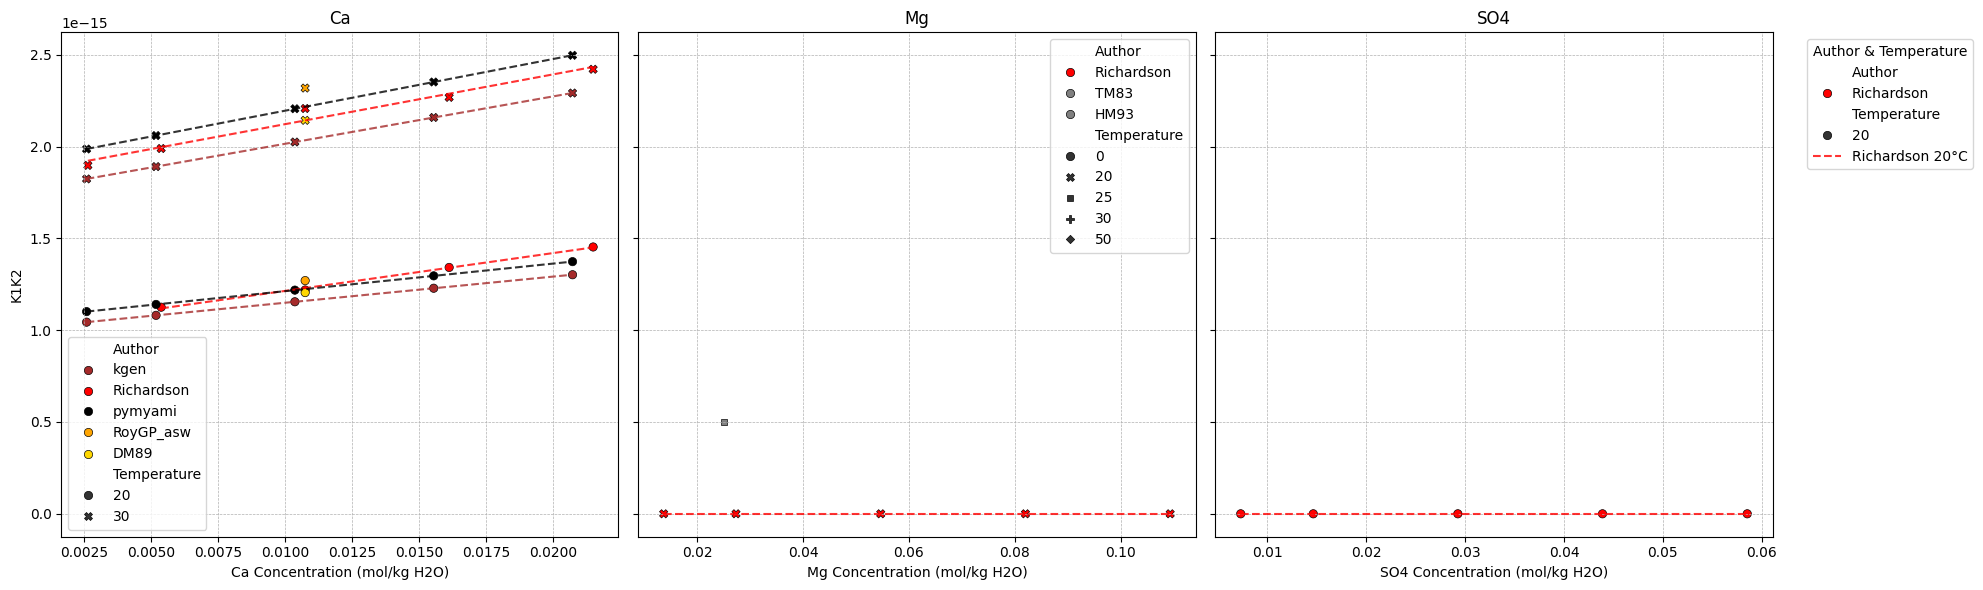


Regression results for Ca at 20°C:
  Author: kgen, Slope: 1.4242632424575596e-07, R²: 1.00000
  Author: Richardson, Slope: 2.059806822187308e-07, R²: 0.99736
  Author: pymyami, Slope: 1.5011729661519758e-07, R²: 1.00000
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan

Regression results for Ca at 30°C:
  Author: kgen, Slope: 2.5811209420501215e-07, R²: 1.00000
  Author: pymyami, Slope: 2.8148192624873604e-07, R²: 1.00000
  Author: Richardson, Slope: 2.7107825875371527e-07, R²: 0.96968
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan


/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


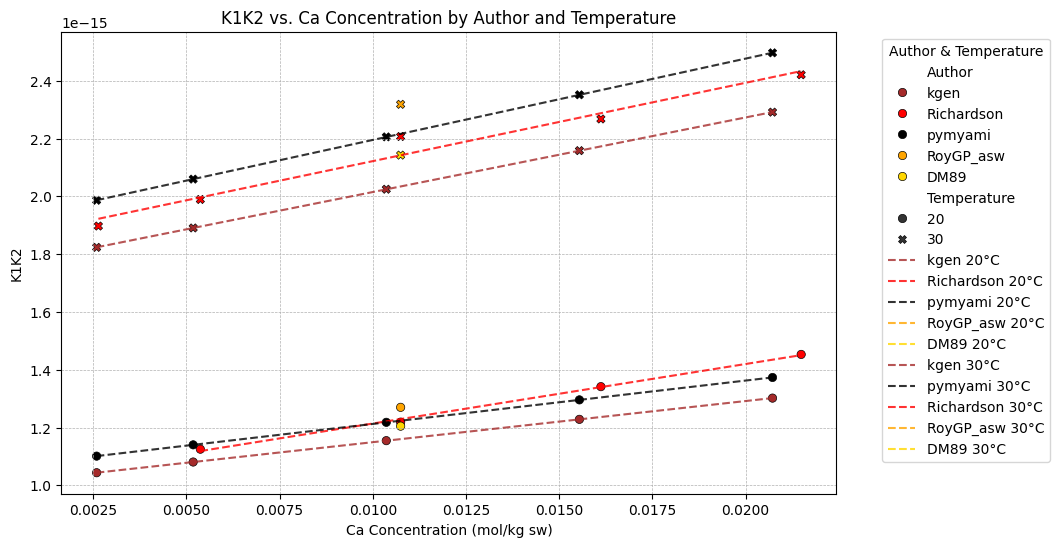

/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Regression results for Ca:
  Author: kgen, Slope: 2.5811209420501215e-07, R²: 1.00000
  Author: pymyami, Slope: 2.8148192624873604e-07, R²: 1.00000
  Author: Richardson, Slope: 2.7107825875371527e-07, R²: 0.96968
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan

Regression results for Mg at 20°C:
  Author: Richardson, Slope: 0.0, R²: 1.00000

Regression results for Mg at 25°C:
  Author: TM83, Slope: 0.0, R²: nan

Regression results for Mg at 30°C:

Regression results for Mg at 0°C:

Regression results for Mg at 50°C:


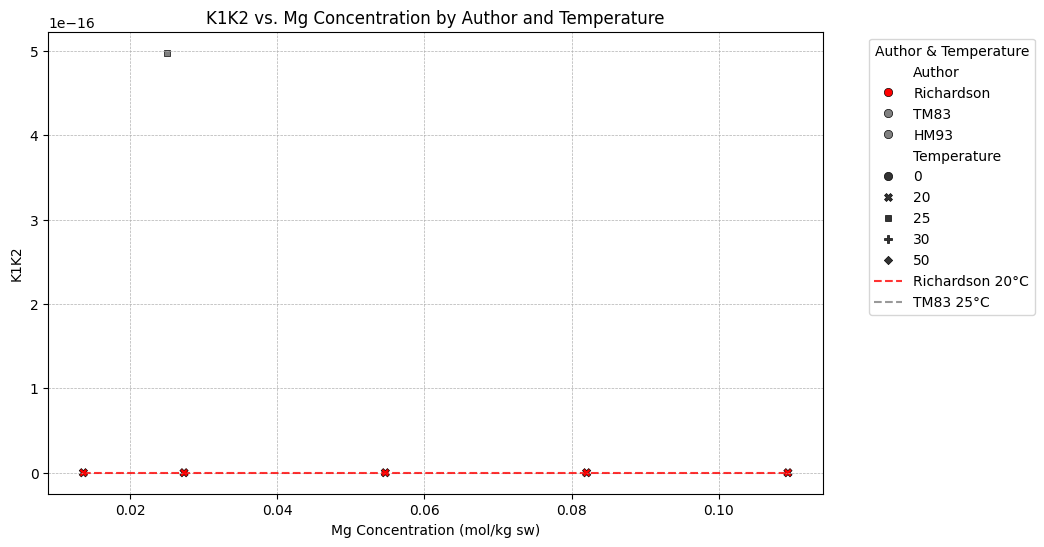


Regression results for Mg:

Regression results for SO4 at 20°C:
  Author: Richardson, Slope: -0.0, R²: 1.00000


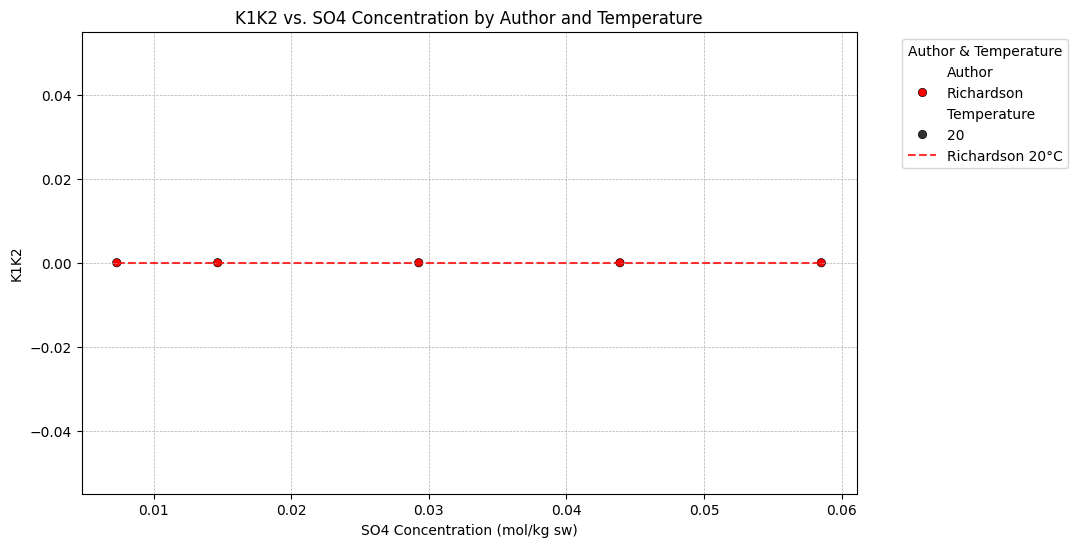


Regression results for SO4:
  Author: Richardson, Slope: -0.0, R²: 1.00000
[20]
Empty DataFrame
Columns: [Concentration (molkg H2O), Ion, K1, K1_stdev, K2, K2_stdev, K1K2, K1K2_stdev, Ionic Strength, Salinity, Temperature, Author, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17]
Index: []


In [80]:
# Create subplots for each ion
fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 6), sharey=True)

# Ensure axs is iterable if there's only one ion
if len(ions) == 1:
    axs = [axs]

# Iterate over ions and corresponding axes
for ax, ion in zip(axs, ions):
    df = data[data["Ion"] == ion]

    # Scatter plot for K1K2
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K1K2",  # Updated to K1K2
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black",
        ax=ax
    )

    # Add linear regression for each author for a given temperature
    for temp in df["Temperature"].unique():
        temp_data = df[df["Temperature"] == temp]
        regression_results_temp = {}

        for author in temp_data["Author"].unique():
            sub_df = temp_data[temp_data["Author"] == author]

            # Drop rows where either 'Concentration (molkg H2O)' or 'K1K2' are NaN
            sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K1K2"])

            if len(sub_df) > 0:  # Need at least 2 points for regression
                X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
                y = sub_df["K1K2"].values  # Updated to K1K2

                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)

                # Plot regression line
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                y_range = model.predict(x_range)
                ax.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8, label=f"{author} {temp}°C")

    # Add error bars for K1K2
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        ax.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K1K2"],  # Updated to K1K2
            yerr=sub_df["K1K2_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Formatting
    ax.set_xlabel(f"{ion} Concentration (mol/kg H2O)")
    ax.set_title(f"{ion}")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Set shared y-axis label
axs[0].set_ylabel("K1K2")  # Updated to K1K2

# Adjust layout and add legend
plt.tight_layout()
plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Define a fixed palette mapping all authors in the dataset
palette = {author: author_colors.get(author, 'gray') for author in unique_authors}

for ion in ions:
    df = data[data["Ion"] == ion]

    # Create the plot for K1K2
    plt.figure(figsize=(10, 6))

    # Scatter plot for K1K2
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K1K2",  # Updated to K1K2
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black"
    )

    # Add linear regression for each author for a given temperature
    for temp in df["Temperature"].unique():
        temp_data = df[df["Temperature"] == temp]
        regression_results_temp = {}

        for author in temp_data["Author"].unique():
            sub_df = temp_data[temp_data["Author"] == author]

            # Drop rows where either 'Concentration (molkg H2O)' or 'K1K2' are NaN
            sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K1K2"])

            if len(sub_df) > 0:  # Need at least 2 points for regression
                X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
                y = sub_df["K1K2"].values  # Updated to K1K2

                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)
                
                # Calculate R^2
                r2 = r2_score(y, y_pred)
                slope = model.coef_[0]
                regression_results_temp[author] = (slope, r2)

                # Plot regression line
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                y_range = model.predict(x_range)
                plt.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8, label=f"{author} {temp}°C")

        # Print regression results for the temperature
        print(f"\nRegression results for {ion} at {temp}°C:")
        for author, (slope, r2) in regression_results_temp.items():
            print(f"  Author: {author}, Slope: {slope*10e6}, R²: {r2:.5f}")  

    # Add error bars for K1K2
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        plt.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K1K2"],  # Updated to K1K2
            yerr=sub_df["K1K2_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Labels and title
    plt.xlabel(f"{ion} Concentration (mol/kg sw)")
    plt.ylabel("K1K2")  # Updated to K1K2
    plt.title(f"K1K2 vs. {ion} Concentration by Author and Temperature")
    plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

    # Print regression results
    print(f"\nRegression results for {ion}:")
    for author, (slope, r2) in regression_results_temp.items():
        print(f"  Author: {author}, Slope: {slope*10e6}, R²: {r2:.5f}")

print(df["Temperature"].unique())
print(df[df["Temperature"] == 30])


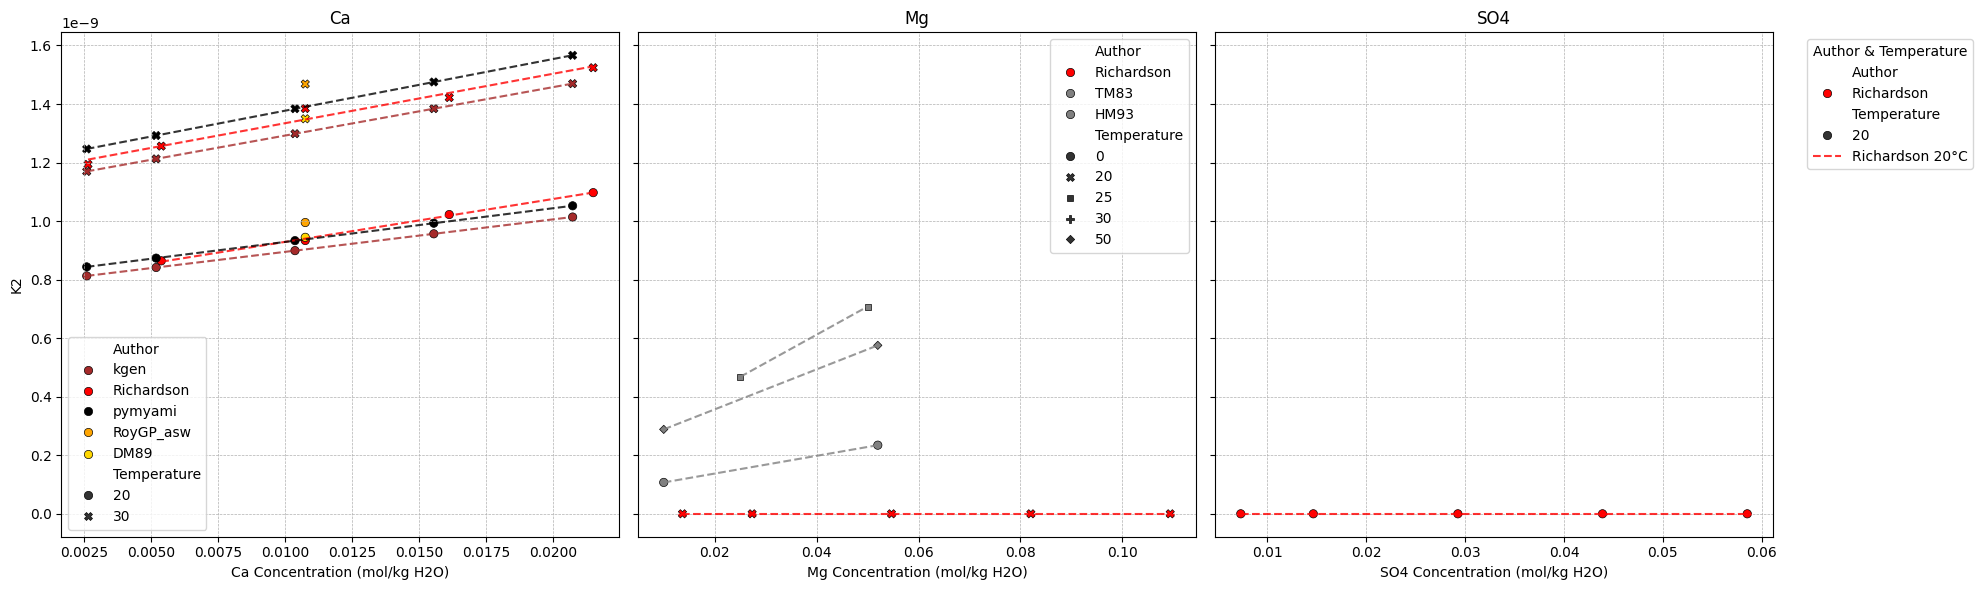


Regression results for Ca at 20°C:
  Author: kgen, Slope: 0.11100261688993694, R²: 1.00000
  Author: Richardson, Slope: 0.1465958530532925, R²: 0.99797
  Author: pymyami, Slope: 0.11511297574786646, R²: 1.00000
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan

Regression results for Ca at 30°C:
  Author: kgen, Slope: 0.16545104373902936, R²: 1.00000
  Author: pymyami, Slope: 0.17652535332102642, R²: 1.00000
  Author: Richardson, Slope: 0.16892605929781418, R²: 0.97215
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan


/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/pytzer/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


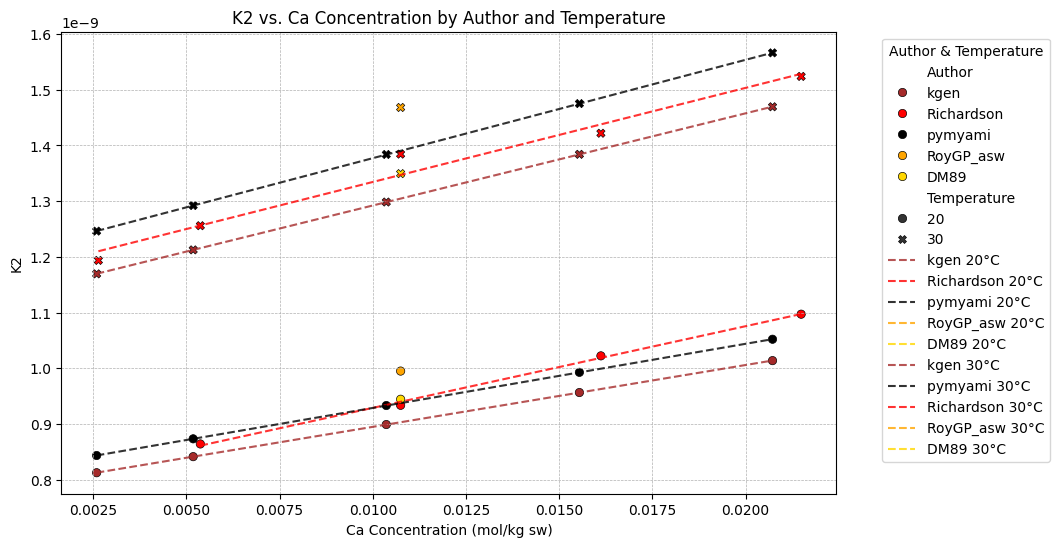


Regression results for Ca:
  Author: kgen, Slope: 0.16545104373902936, R²: 1.00000
  Author: pymyami, Slope: 0.17652535332102642, R²: 1.00000
  Author: Richardson, Slope: 0.16892605929781418, R²: 0.97215
  Author: RoyGP_asw, Slope: 0.0, R²: nan
  Author: DM89, Slope: 0.0, R²: nan

Regression results for Mg at 20°C:
  Author: Richardson, Slope: 0.0, R²: 1.00000

Regression results for Mg at 25°C:
  Author: TM83, Slope: 0.0960842572387761, R²: 1.00000

Regression results for Mg at 30°C:

Regression results for Mg at 0°C:
  Author: HM93, Slope: 0.030302607382912163, R²: 1.00000

Regression results for Mg at 50°C:
  Author: HM93, Slope: 0.06834209214868912, R²: 1.00000


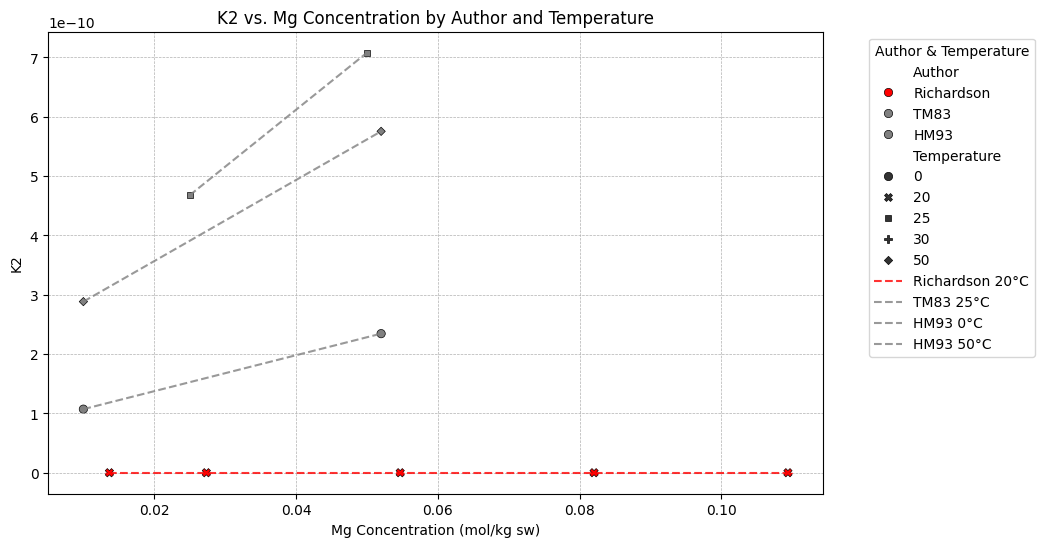


Regression results for Mg:
  Author: HM93, Slope: 0.06834209214868912, R²: 1.00000

Regression results for SO4 at 20°C:
  Author: Richardson, Slope: -0.0, R²: 1.00000


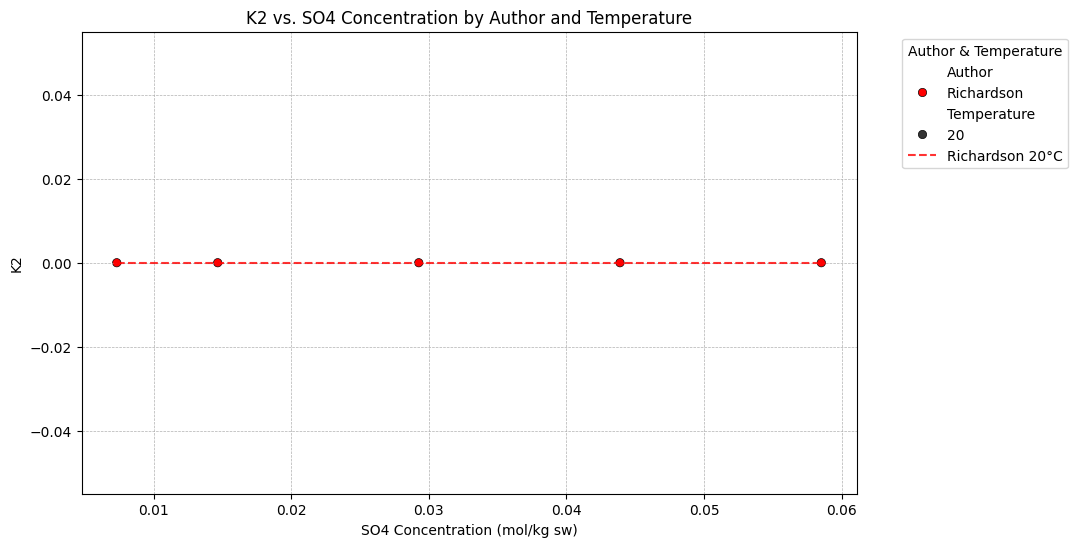


Regression results for SO4:
  Author: Richardson, Slope: -0.0, R²: 1.00000
[20]
Empty DataFrame
Columns: [Concentration (molkg H2O), Ion, K1, K1_stdev, K2, K2_stdev, K1K2, K1K2_stdev, Ionic Strength, Salinity, Temperature, Author, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17]
Index: []


In [81]:
# Create subplots for each ion
fig, axs = plt.subplots(1, len(ions), figsize=(6 * len(ions), 6), sharey=True)

# Ensure axs is iterable if there's only one ion
if len(ions) == 1:
    axs = [axs]

# Iterate over ions and corresponding axes
for ax, ion in zip(axs, ions):
    df = data[data["Ion"] == ion]

    # Scatter plot for K2
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K2",  # Updated to K2
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black",
        ax=ax
    )

    # Add linear regression for each author for a given temperature
    for temp in df["Temperature"].unique():
        temp_data = df[df["Temperature"] == temp]
        regression_results_temp = {}

        for author in temp_data["Author"].unique():
            sub_df = temp_data[temp_data["Author"] == author]

            # Drop rows where either 'Concentration (molkg H2O)' or 'K2' are NaN
            sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K2"])

            if len(sub_df) > 0:  # Need at least 2 points for regression
                X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
                y = sub_df["K2"].values  # Updated to K2

                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)

                # Plot regression line
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                y_range = model.predict(x_range)
                ax.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8, label=f"{author} {temp}°C")

    # Add error bars for K2
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        ax.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K2"],  # Updated to K2
            yerr=sub_df["K2_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Formatting
    ax.set_xlabel(f"{ion} Concentration (mol/kg H2O)")
    ax.set_title(f"{ion}")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Set shared y-axis label
axs[0].set_ylabel("K2")  # Updated to K2

# Adjust layout and add legend
plt.tight_layout()
plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Define a fixed palette mapping all authors in the dataset
palette = {author: author_colors.get(author, 'gray') for author in unique_authors}

for ion in ions:
    df = data[data["Ion"] == ion]

    # Create the plot for K2
    plt.figure(figsize=(10, 6))

    # Scatter plot for K2
    sns.scatterplot(
        data=df,
        x="Concentration (molkg H2O)",
        y="K2",  # Updated to K2
        hue="Author",
        style="Temperature",
        palette=palette,
        edgecolor="black"
    )

    # Add linear regression for each author for a given temperature
    for temp in df["Temperature"].unique():
        temp_data = df[df["Temperature"] == temp]
        regression_results_temp = {}

        for author in temp_data["Author"].unique():
            sub_df = temp_data[temp_data["Author"] == author]

            # Drop rows where either 'Concentration (molkg H2O)' or 'K2' are NaN
            sub_df = sub_df.dropna(subset=["Concentration (molkg H2O)", "K2"])

            if len(sub_df) > 0:  # Need at least 2 points for regression
                X = sub_df["Concentration (molkg H2O)"].values.reshape(-1, 1)
                y = sub_df["K2"].values  # Updated to K2

                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)
                
                # Calculate R^2
                r2 = r2_score(y, y_pred)
                slope = model.coef_[0]
                regression_results_temp[author] = (slope, r2)

                # Plot regression line
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                y_range = model.predict(x_range)
                plt.plot(x_range, y_range, color=palette.get(author, 'gray'), linestyle='dashed', alpha=0.8, label=f"{author} {temp}°C")

        # Print regression results for the temperature
        print(f"\nRegression results for {ion} at {temp}°C:")
        for author, (slope, r2) in regression_results_temp.items():
            print(f"  Author: {author}, Slope: {slope*10e6}, R²: {r2:.5f}")  

    # Add error bars for K2
    for author in df["Author"].unique():
        sub_df = df[df["Author"] == author]
        plt.errorbar(
            sub_df["Concentration (molkg H2O)"], 
            sub_df["K2"],  # Updated to K2
            yerr=sub_df["K2_stdev"],  
            fmt='none',  
            ecolor=palette.get(author, 'gray'),  
            elinewidth=1, capsize=3, alpha=0.7
        )

    # Labels and title
    plt.xlabel(f"{ion} Concentration (mol/kg sw)")
    plt.ylabel("K2")  # Updated to K2
    plt.title(f"K2 vs. {ion} Concentration by Author and Temperature")
    plt.legend(title="Author & Temperature", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

    # Print regression results
    print(f"\nRegression results for {ion}:")
    for author, (slope, r2) in regression_results_temp.items():
        print(f"  Author: {author}, Slope: {slope*10e6}, R²: {r2:.5f}")

print(df["Temperature"].unique())
print(df[df["Temperature"] == 30])


In [94]:

d = pd.read_excel('/Users/cameronrichardson/Documents/Thesis/Experiments/data/processedData.xlsx', sheet_name='export')

# # Define ion list and fixed color mapping for authors
ions = ['Ca', 'Mg', 'SO4']
temp = [10, 20, 30]

d

,Temperature,Ionic Strength,Ion,Conc Multiplier,pK1,pK2
0,20.0,0.7,Mg,0.25,NaN,NaN
1,20.0,0.7,Mg,0.25,NaN,NaN
2,20.0,0.7,Mg,0.50,5.884444,9.172298
3,20.0,0.7,Mg,0.50,5.883553,9.170461
4,20.0,0.7,Mg,1.00,5.886148,9.026708
5,20.0,0.7,Mg,1.00,5.882377,9.026957
6,20.0,0.7,Mg,1.50,5.883543,8.929099
7,20.0,0.7,Mg,1.50,5.881799,8.929115
8,20.0,0.7,Mg,2.00,NaN,NaN
9,20.0,0.7,Mg,2.00,NaN,NaN


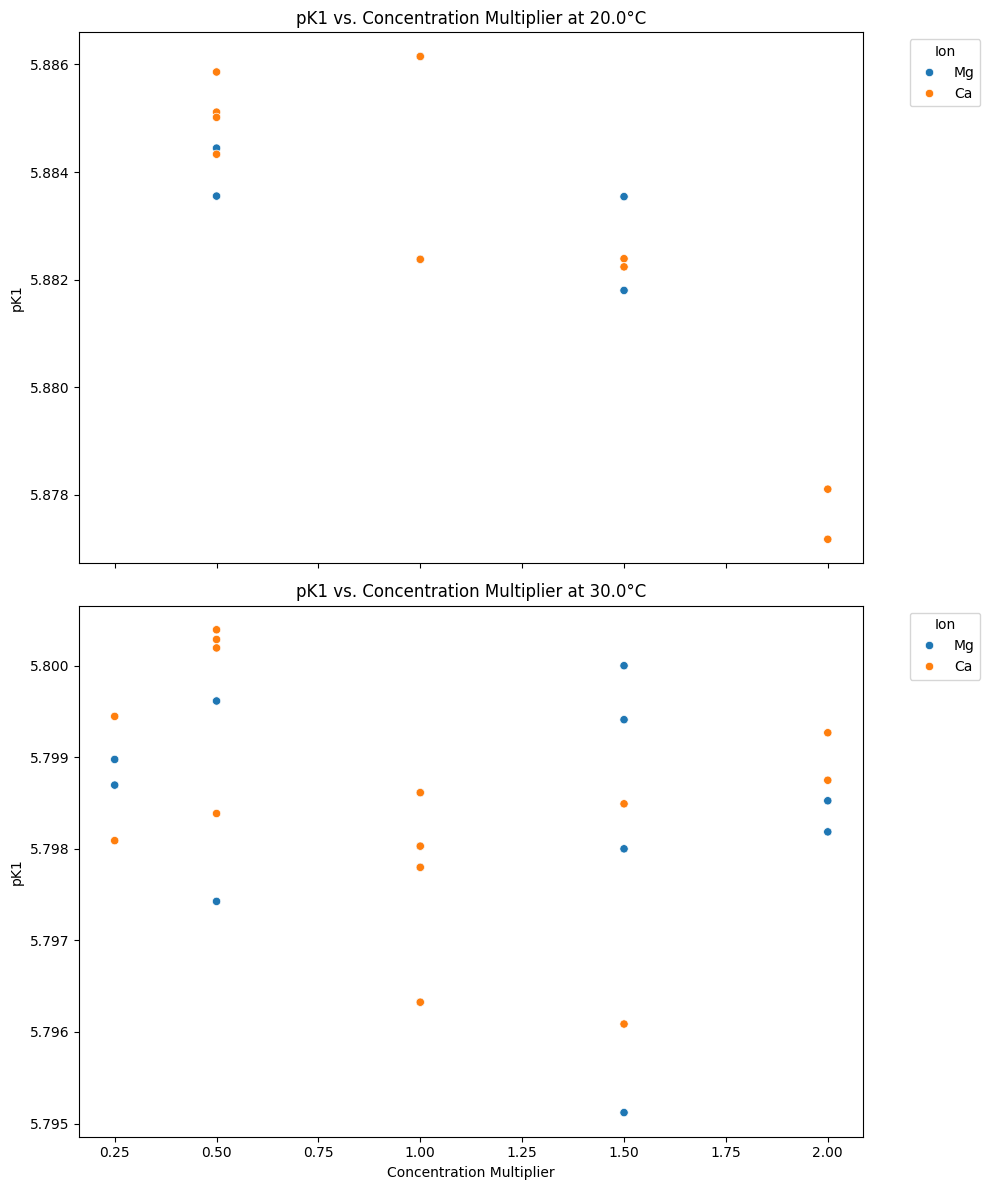

In [95]:

# Filter out rows with NaN values in 'Conc Multiplier' or 'pK1'
filtered_data = d.dropna(subset=['Conc Multiplier', 'pK1'])

# Get unique temperatures
unique_temperatures = filtered_data['Temperature'].unique()

# Create subplots for each temperature
fig, axs = plt.subplots(len(unique_temperatures), 1, figsize=(10, 6 * len(unique_temperatures)), sharex=True)

# Ensure axs is iterable if there's only one temperature
if len(unique_temperatures) == 1:
    axs = [axs]

# Plot data for each temperature
for ax, temp in zip(axs, unique_temperatures):
    temp_data = filtered_data[filtered_data['Temperature'] == temp]
    sns.scatterplot(
        data=temp_data,
        x='Conc Multiplier',
        y='pK1',
        hue='Ion',
        palette='tab10',
        ax=ax
    )
    ax.set_title(f'pK1 vs. Concentration Multiplier at {temp}°C')
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('pK1')
    ax.legend(title='Ion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

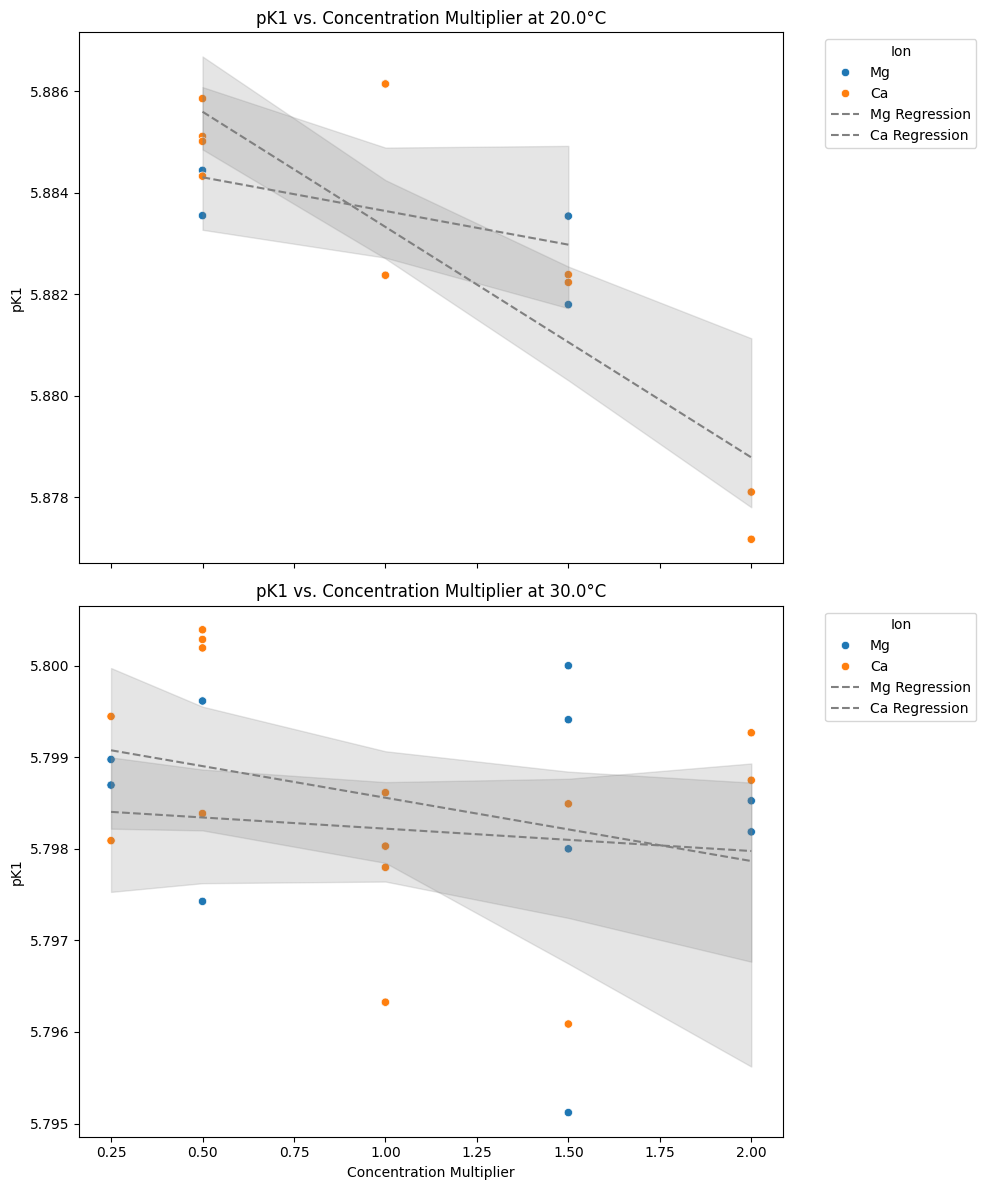


Regression results for each ion at each temperature:

Temperature: 20.0°C
Ion: Mg, Slope: -0.001328, Intercept: 5.884972, R²: 0.147654, p-value: 0.451982

T-test results for each ion:
Ion: Mg, t-statistic: -0.790456, p-value: 0.433778
Ion: Ca, t-statistic: 0.790456, p-value: 0.433778
Ion: Ca, Slope: -0.004542, Intercept: 5.887872, R²: 0.801783, p-value: 0.000460

T-test results for each ion:
Ion: Mg, t-statistic: -0.790456, p-value: 0.433778
Ion: Ca, t-statistic: 0.790456, p-value: 0.433778

Temperature: 30.0°C
Ion: Mg, Slope: -0.000244, Intercept: 5.798465, R²: 0.012292, p-value: 0.705929

T-test results for each ion:
Ion: Mg, t-statistic: -0.790456, p-value: 0.433778
Ion: Ca, t-statistic: 0.790456, p-value: 0.433778
Ion: Ca, Slope: -0.000691, Intercept: 5.799249, R²: 0.097549, p-value: 0.276966

T-test results for each ion:
Ion: Mg, t-statistic: -0.790456, p-value: 0.433778
Ion: Ca, t-statistic: 0.790456, p-value: 0.433778


In [ ]:
from scipy.stats import linregress
from scipy.stats import ttest_ind

# Filter out rows with NaN values in 'Conc Multiplier' or 'pK1'
filtered_data = d.dropna(subset=['Conc Multiplier', 'pK1'])

# Get unique temperatures
unique_temperatures = filtered_data['Temperature'].unique()

# Create subplots for each temperature
fig, axs = plt.subplots(len(unique_temperatures), 1, figsize=(10, 6 * len(unique_temperatures)), sharex=True)

# Ensure axs is iterable if there's only one temperature
if len(unique_temperatures) == 1:
    axs = [axs]

# Plot data for each temperature
for ax, temp in zip(axs, unique_temperatures):
    temp_data = filtered_data[filtered_data['Temperature'] == temp]
    
    # Plot scatter points for each ion
    sns.scatterplot(
        data=temp_data,
        x='Conc Multiplier',
        y='pK1',
        hue='Ion',
        palette='tab10',
        ax=ax
    )
    
    # Perform regression for each ion
    for ion in temp_data['Ion'].unique():
        ion_data = temp_data[temp_data['Ion'] == ion]
        X = ion_data['Conc Multiplier'].values.reshape(-1, 1)
        y = ion_data['pK1'].values
        
        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        # Plot regression line
        ax.plot(X, y_pred, label=f'{ion} Regression', linestyle='--', color=palette.get(ion, 'gray'))
        # ax.plot(X, y_pred, label=f'{ion} Regression', linestyle='--', color=ax.get_lines()[-1].get_color())
        
        # Bootstrap for confidence intervals
        n_bootstraps = 1000
        boot_preds = []
        for _ in range(n_bootstraps):
            X_resampled, y_resampled = resample(X, y)
            model.fit(X_resampled, y_resampled)
            boot_preds.append(model.predict(X))
        
        boot_preds = np.array(boot_preds)
        lower_bound = np.percentile(boot_preds, 5, axis=0)
        upper_bound = np.percentile(boot_preds, 95, axis=0)
        
        # Plot confidence intervals
        ax.fill_between(
            X.flatten(),
            lower_bound,
            upper_bound,
            color=ax.get_lines()[-1].get_color(),
            alpha=0.2
        )
    
    # Set plot title and labels
    ax.set_title(f'pK1 vs. Concentration Multiplier at {temp}°C')
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('pK1')
    ax.legend(title='Ion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print regression results for each ion at each temperature
print("\nRegression results for each ion at each temperature:")
for temp in unique_temperatures:
    temp_data = filtered_data[filtered_data['Temperature'] == temp]
    print(f"\nTemperature: {temp}°C")
    for ion in temp_data['Ion'].unique():
        ion_data = temp_data[temp_data['Ion'] == ion]
        X = ion_data['Conc Multiplier'].values
        y = ion_data['pK1'].values

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(X, y)

        print(f"Ion: {ion}, Slope: {slope:.6f}, Intercept: {intercept:.6f}, R²: {r_value**2:.6f}, p-value: {p_value:.6f}")






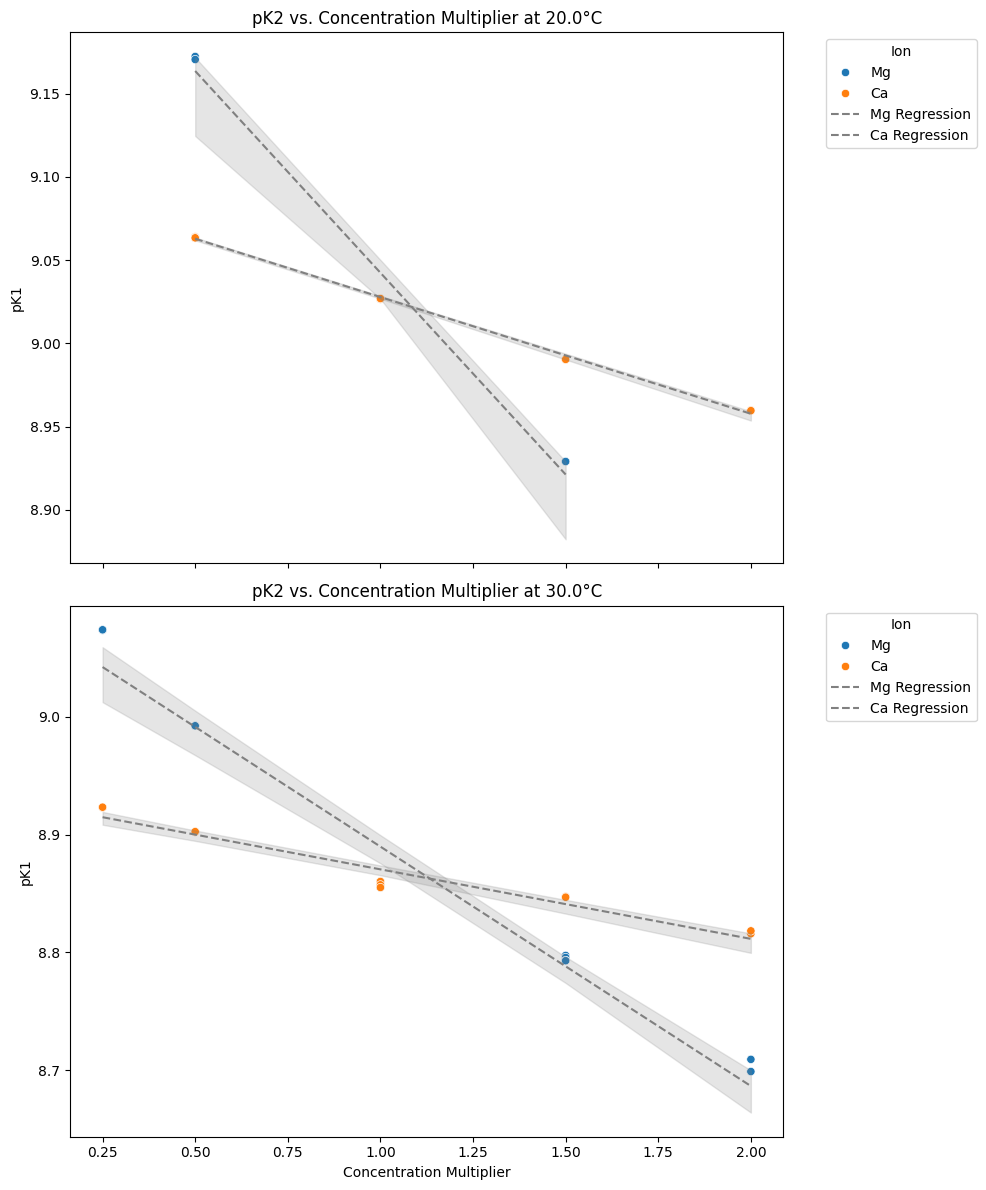

In [103]:
# Filter out rows with NaN values in 'Conc Multiplier' or 'pK2'
filtered_data = d.dropna(subset=['Conc Multiplier', 'pK2'])

# Get unique temperatures
unique_temperatures = filtered_data['Temperature'].unique()

# Create subplots for each temperature
fig, axs = plt.subplots(len(unique_temperatures), 1, figsize=(10, 6 * len(unique_temperatures)), sharex=True)

# Ensure axs is iterable if there's only one temperature
if len(unique_temperatures) == 1:
    axs = [axs]

# Plot data for each temperature
for ax, temp in zip(axs, unique_temperatures):
    temp_data = filtered_data[filtered_data['Temperature'] == temp]
    
    # Plot scatter points for each ion
    sns.scatterplot(
        data=temp_data,
        x='Conc Multiplier',
        y='pK2',
        hue='Ion',
        palette='tab10',
        ax=ax
    )
    
    # Perform regression for each ion
    for ion in temp_data['Ion'].unique():
        ion_data = temp_data[temp_data['Ion'] == ion]
        X = ion_data['Conc Multiplier'].values.reshape(-1, 1)
        y = ion_data['pK2'].values
        
        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        # Plot regression line
        ax.plot(X, y_pred, label=f'{ion} Regression', linestyle='--', color=palette.get(ion, 'gray'))
        # ax.plot(X, y_pred, label=f'{ion} Regression', linestyle='--', color=ax.get_lines()[-1].get_color())
        
        # Bootstrap for confidence intervals
        n_bootstraps = 10000
        boot_preds = []
        for _ in range(n_bootstraps):
            X_resampled, y_resampled = resample(X, y)
            model.fit(X_resampled, y_resampled)
            boot_preds.append(model.predict(X))
        
        boot_preds = np.array(boot_preds)
        lower_bound = np.percentile(boot_preds, 5, axis=0)
        upper_bound = np.percentile(boot_preds, 95, axis=0)
        
        # Plot confidence intervals
        ax.fill_between(
            X.flatten(),
            lower_bound,
            upper_bound,
            color=ax.get_lines()[-1].get_color(),
            alpha=0.2
        )
    
    # Set plot title and labels
    ax.set_title(f'pK2 vs. Concentration Multiplier at {temp}°C')
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('pK1')
    ax.legend(title='Ion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

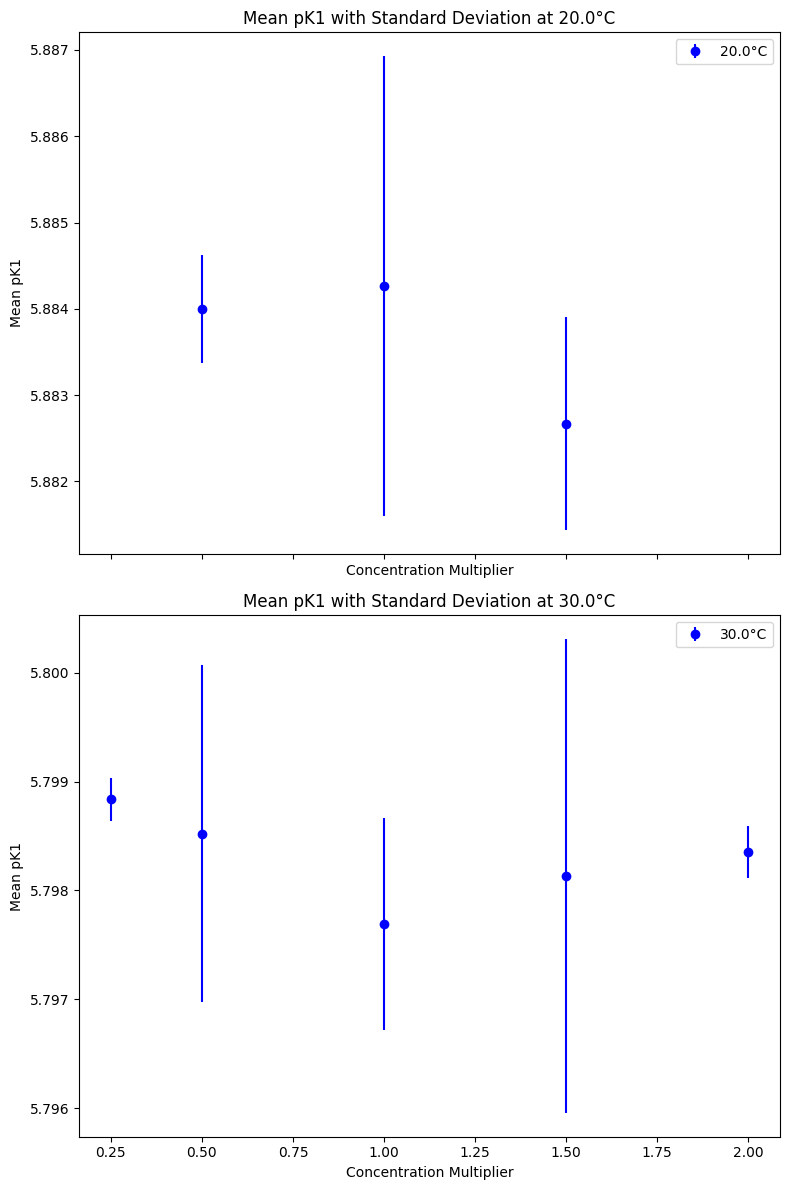

In [ ]:
# Filter data for Mg
mg_data = d[d['Ion'] == 'Mg']

# Group data by Temperature and calculate mean and standard deviation for pK1
mg_stats = mg_data.groupby(['Temperature', 'Conc Multiplier'])['pK1'].agg(['mean', 'std']).reset_index()

# Get unique temperatures
unique_temperatures = mg_stats['Temperature'].unique()

# Create subplots for each temperature
fig, axs = plt.subplots(len(unique_temperatures), 1, figsize=(8, 6 * len(unique_temperatures)), sharex=True)

# Ensure axs is iterable if there's only one temperature
if len(unique_temperatures) == 1:
    axs = [axs]

# Plot data for each temperature
for ax, temp in zip(axs, unique_temperatures):
    temp_data = mg_stats[mg_stats['Temperature'] == temp]
    ax.errorbar(temp_data['Conc Multiplier'], temp_data['mean'], yerr=temp_data['std'], fmt='o', label=f'{temp}°C', color='blue')
    ax.set_title(f'Mean pK1 with Standard Deviation at {temp}°C')
    ax.set_xlabel('Concentration Multiplier')
    ax.set_ylabel('Mean pK1')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

